In [1]:
import pandas as pd
import numpy as np
from utils.utils import *
from pymatgen.core import Composition
from utils.Featurizor import Featurizor
from sklearn.ensemble import VotingClassifier
# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns

# Splitting data into training and testing
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')

config = {
    "mathtext.fontset": 'stix',
    "font.family": 'sans-serif',
    "font.sans-serif": ['Times New Roman'],
    "font.size": 24,
    'axes.unicode_minus': False
}
rcParams.update(config)
plt.rcParams['axes.unicode_minus'] = False
large = 22
med = 16
small = 12
params = {
    'axes.titlesize': large,
    'legend.fontsize': med,
    'figure.figsize': (8, 6),
    'axes.labelsize': med,
    'axes.titlesize': med,
    'xtick.labelsize': med,
    'ytick.labelsize': med,
    'figure.titlesize': large
}
plt.rcParams.update(params)
plt.rcParams['figure.dpi'] = 300
seed = 42

In [2]:
from mp_api.client import MPRester
m = MPRester('nqUYyfjrG2R2IPVhuAy4GFqyGYaoWjbH')
spacegroup_numbers = [227]
result = []
C = ['O','S','Se','Te','Cl','F']
for spacegroup in spacegroup_numbers:
    for c in C:
        docs = m.summary.search(formula='*1*2{}4'.format(c), spacegroup_number= spacegroup)
        if len(docs) > 0:
            tmp_dict = {}
            for doc in docs:
                doc_dict = dict(doc)
                doc_dict['spacegroup_number'] = doc.symmetry.number
                result.append(doc_dict)

Retrieving SummaryDoc documents:   0%|          | 0/170 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/106 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/42 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

In [3]:
spinels = pd.DataFrame(result)
spinels = spinels[['formula_pretty','is_gap_direct','band_gap','structure']]
spinels.columns=['formula',r'$y$','band gap','structure']
spinels

,formula,$y$,band gap,structure
0,NaMn2O4,False,0.0000,"[[4.229859 4.229859 4.229859] Na, [6.3447885 6..."
1,Mg2FeO4,False,0.0000,"[[5.31263625 3.18758175 3.18758175] Mg, [5.312..."
2,Gd2CdO4,True,0.0000,"[[3.65343075 3.65343075 6.08905125] Gd, [6.089..."
3,CaIn2O4,True,2.0208,"[[0.98066019 3.25582617 1.83688805] Ca, [ 2.94..."
4,Si(NiO2)2,True,3.5770,"[[0.81930158 0.57942515 1.41926313] Si, [5.734..."
...,...,...,...,...
320,Dy2CdTe4,False,0.0000,"[[7.90082125 4.74049275 4.74049275] Dy, [4.740..."
321,Cr2CuTe4,False,0.0000,"[[4.57184554 3.23277792 7.91867596] Cr, [4.571..."
322,Li2ZnCl4,False,4.1422,"[[3.85676751 3.85677152 1.28550518] Li, [3.856..."
323,LiAg2F4,False,0.0000,"[[0. 0. 0.] Li, [2.3405165 2.3405165 2.3405165..."


In [4]:
A = []
B = []
C = []
for i,row in spinels.iterrows():
    record = {}
    comp = Composition(row['formula'])
    for k, v in comp.items():
        if v == 1: A.append(k.symbol)
        if v == 2: B.append(k.symbol)
        if v == 4: C.append(k.symbol)
spinels['A'] = A
spinels['B'] = B
spinels['C'] = C
spinels

,formula,$y$,band gap,structure,A,B,C
0,NaMn2O4,False,0.0000,"[[4.229859 4.229859 4.229859] Na, [6.3447885 6...",Na,Mn,O
1,Mg2FeO4,False,0.0000,"[[5.31263625 3.18758175 3.18758175] Mg, [5.312...",Fe,Mg,O
2,Gd2CdO4,True,0.0000,"[[3.65343075 3.65343075 6.08905125] Gd, [6.089...",Cd,Gd,O
3,CaIn2O4,True,2.0208,"[[0.98066019 3.25582617 1.83688805] Ca, [ 2.94...",Ca,In,O
4,Si(NiO2)2,True,3.5770,"[[0.81930158 0.57942515 1.41926313] Si, [5.734...",Si,Ni,O
...,...,...,...,...,...,...,...
320,Dy2CdTe4,False,0.0000,"[[7.90082125 4.74049275 4.74049275] Dy, [4.740...",Cd,Dy,Te
321,Cr2CuTe4,False,0.0000,"[[4.57184554 3.23277792 7.91867596] Cr, [4.571...",Cu,Cr,Te
322,Li2ZnCl4,False,4.1422,"[[3.85676751 3.85677152 1.28550518] Li, [3.856...",Zn,Li,Cl
323,LiAg2F4,False,0.0000,"[[0. 0. 0.] Li, [2.3405165 2.3405165 2.3405165...",Li,Ag,F


In [5]:
A_count = spinels['A'].value_counts()
B_count = spinels['B'].value_counts()

In [6]:
from matplotlib.colors import LinearSegmentedColormap

def create_gradient_palette(start_color, end_color, num_colors):
    gradient = np.linspace(0, 1, num_colors)
    gradient_colors = [(gradient[i], color) for i, color in enumerate(LinearSegmentedColormap.from_list("", [start_color, end_color])(gradient))]
    return gradient_colors

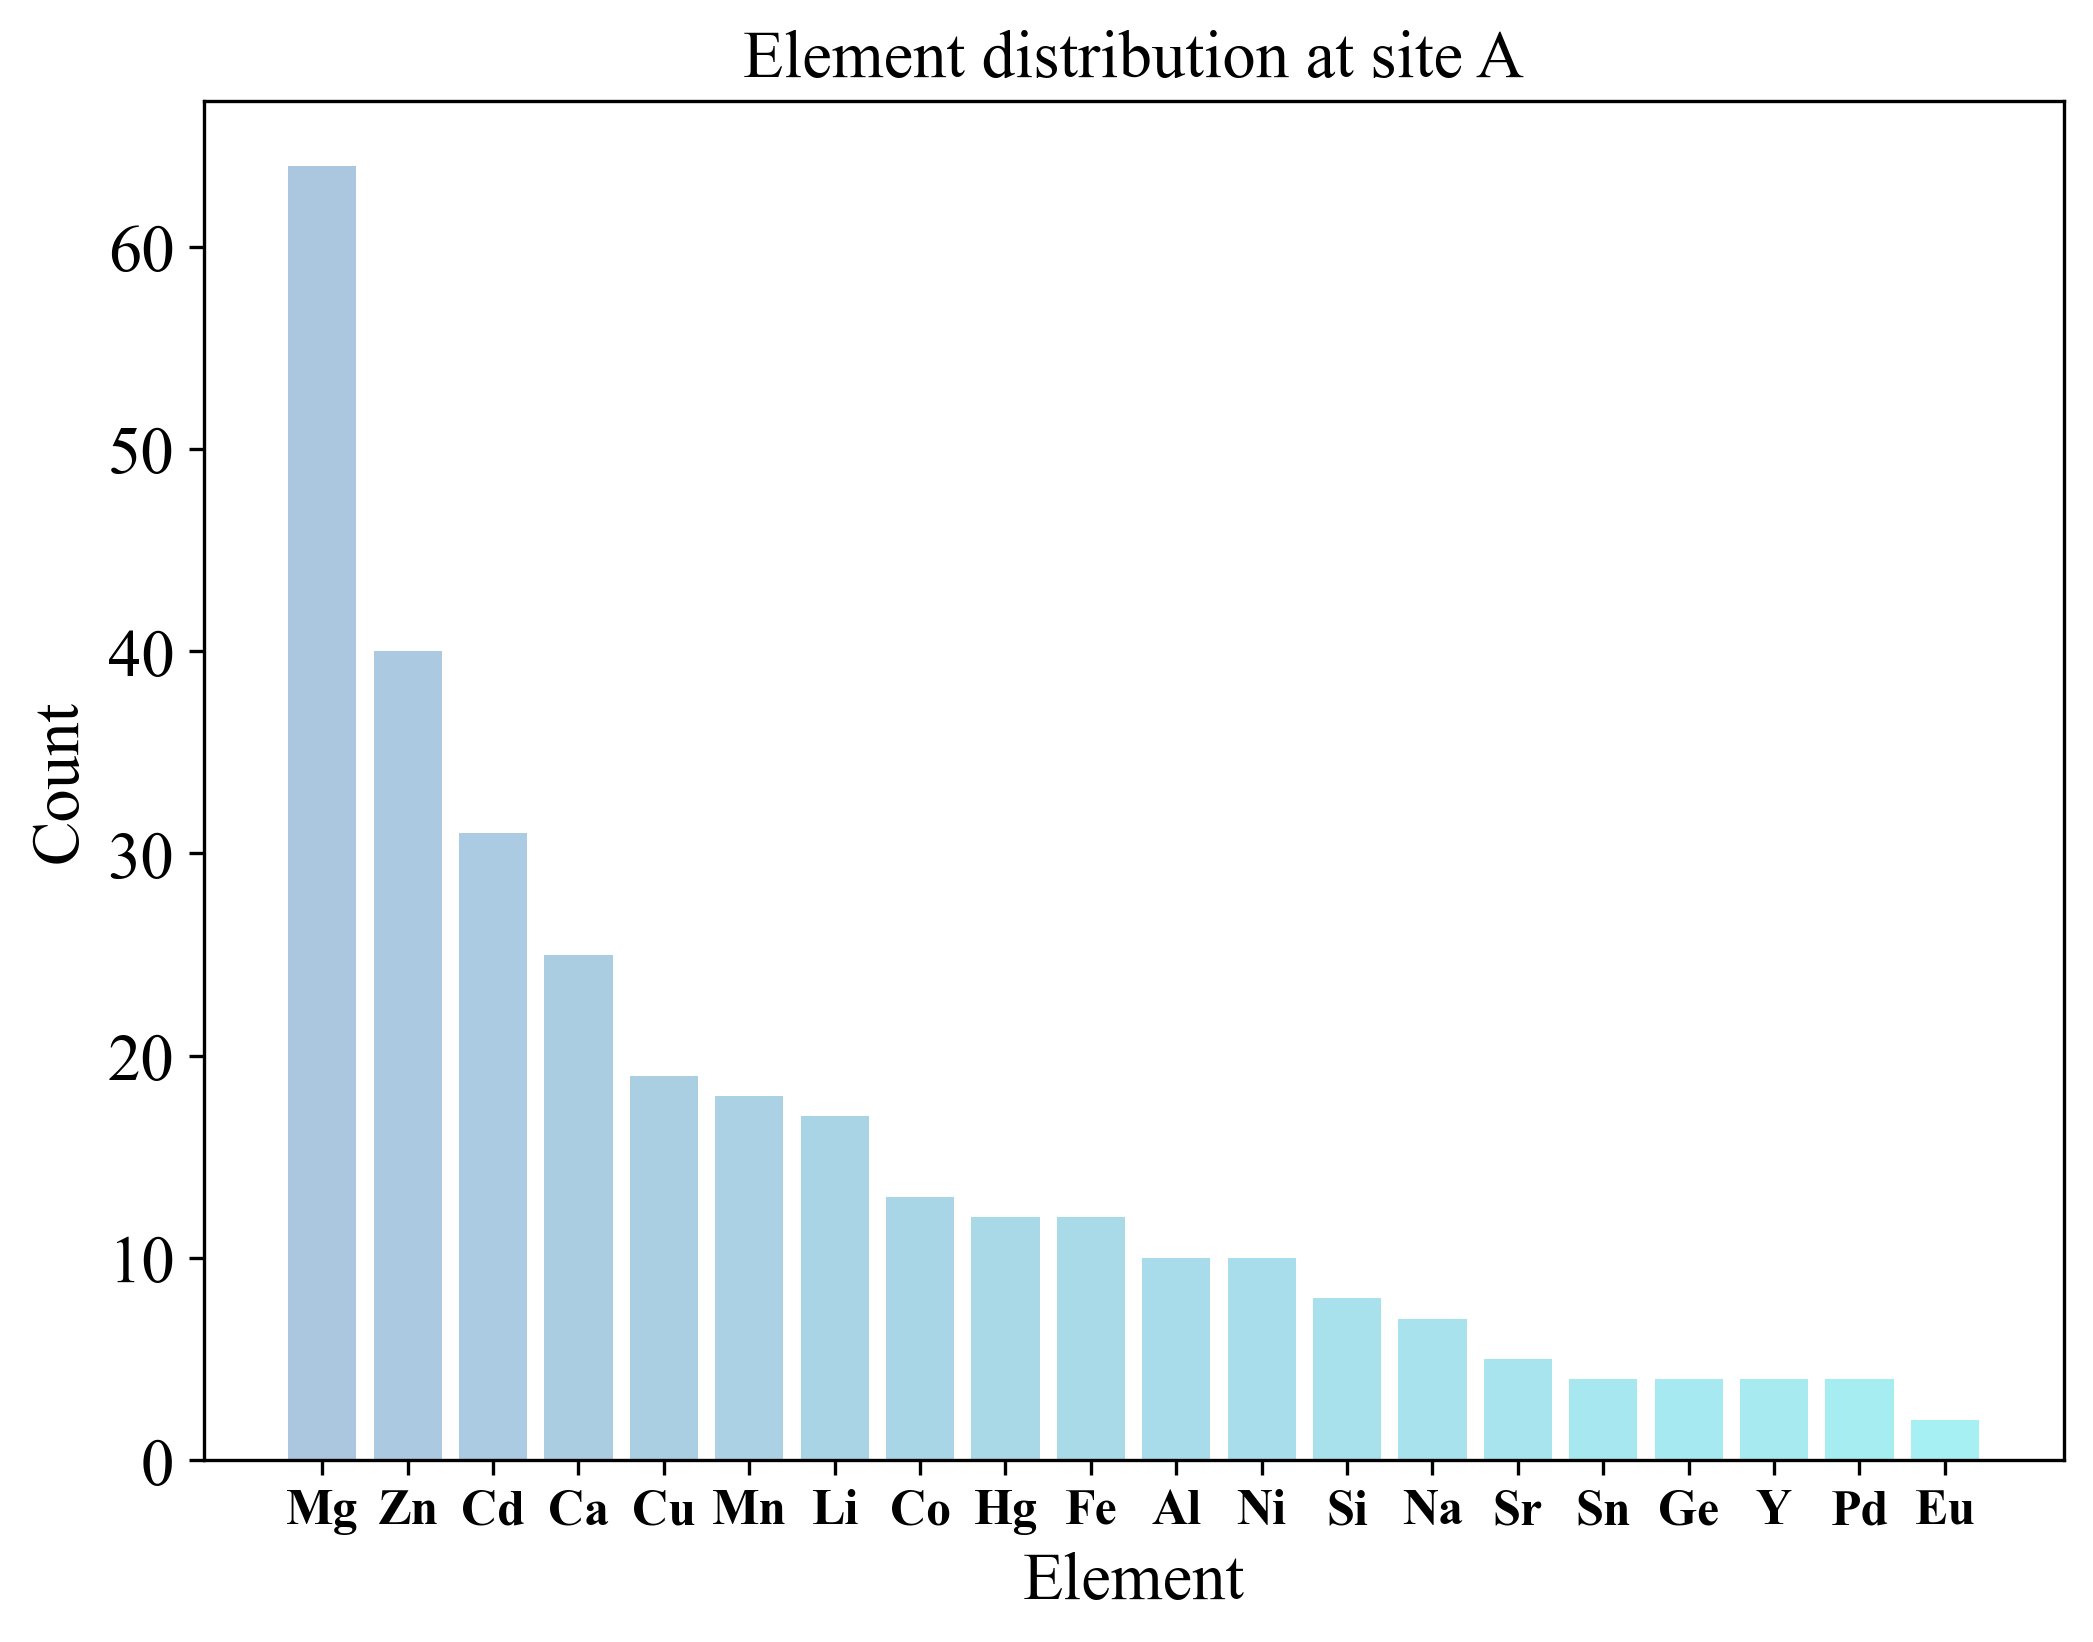

In [7]:
start_blue = '#ABC7DF'
end_blue = '#A6EFF3'
num_colors = 20
blue_palette = create_gradient_palette(start_blue, end_blue, num_colors)
plt.bar(A_count.index[:20],A_count.values[:20],color=[color for _, color in blue_palette])
plt.xlabel('Element')
plt.ylabel('Count')
plt.title('Element distribution at site A')
plt.tick_params(axis='x',labelsize=12) 
plt.xticks(fontweight='bold')
plt.show()

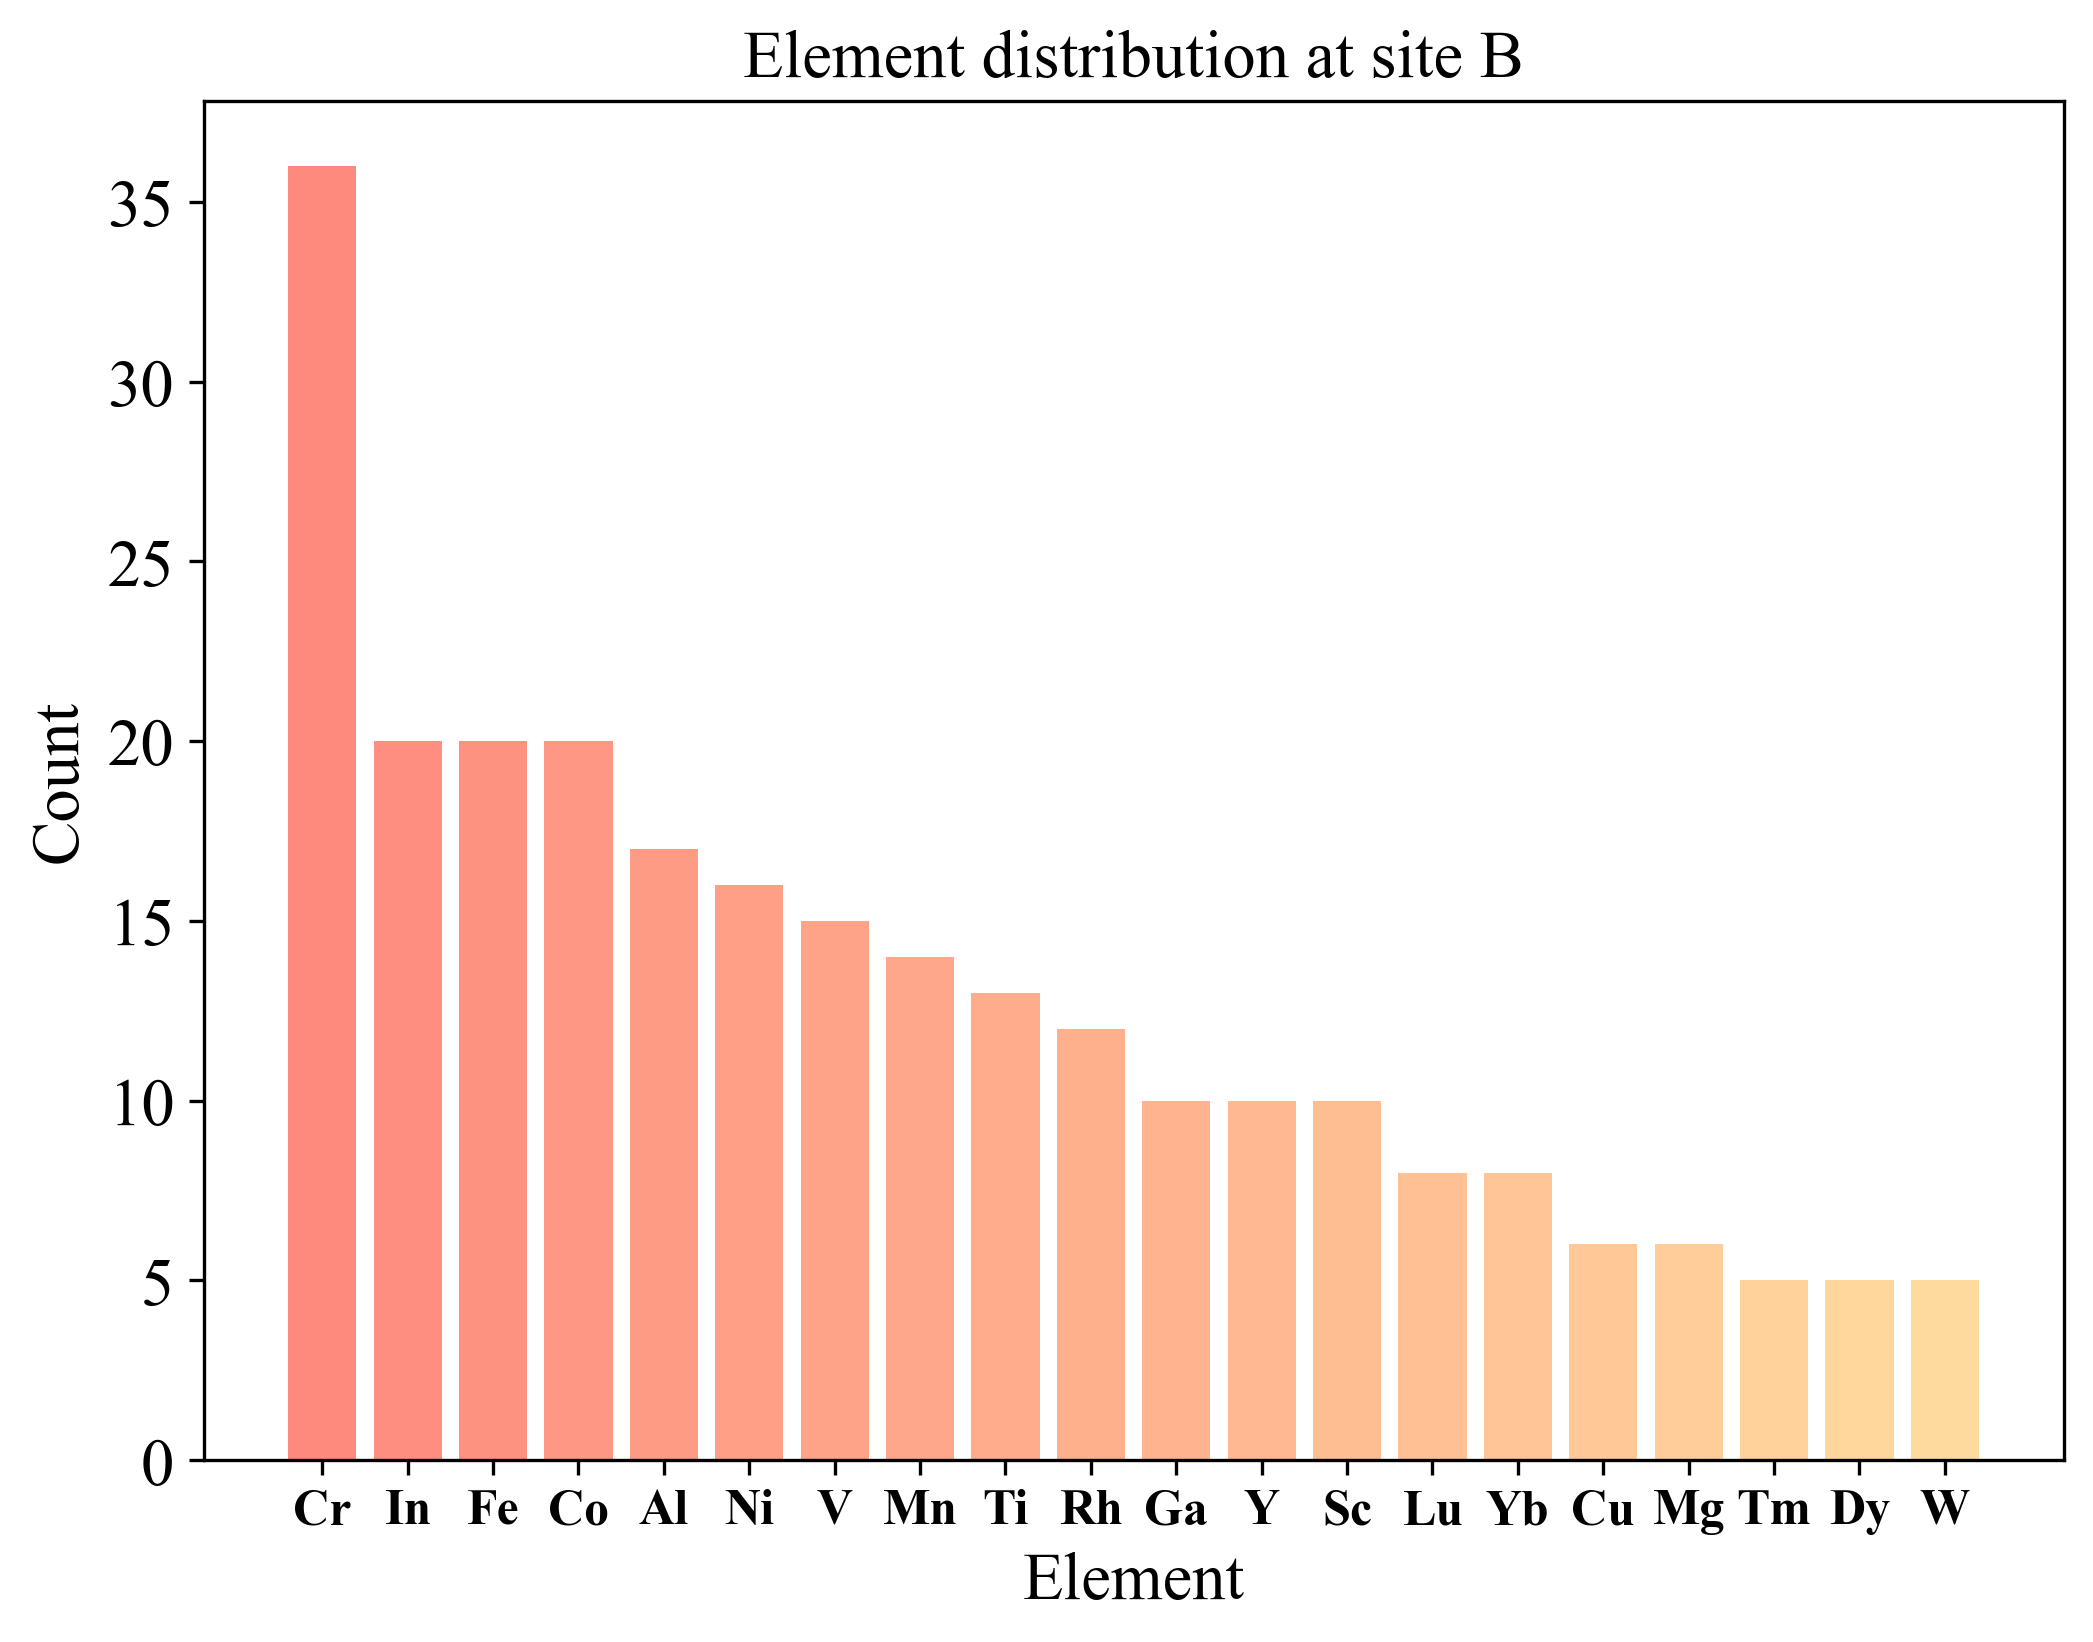

In [8]:
start_orange ='#FE8A7E'
end_orange ='#ffda9e'
num_colors = 20
orange_palette = create_gradient_palette(start_orange, end_orange, num_colors)
plt.bar(B_count.index[:20],B_count.values[:20],color=[color for _, color in orange_palette])
plt.xlabel('Element')
plt.ylabel('Count')
plt.title('Element distribution at site B')
plt.tick_params(axis='x',labelsize=12)
plt.xticks(fontweight='bold')
plt.show()

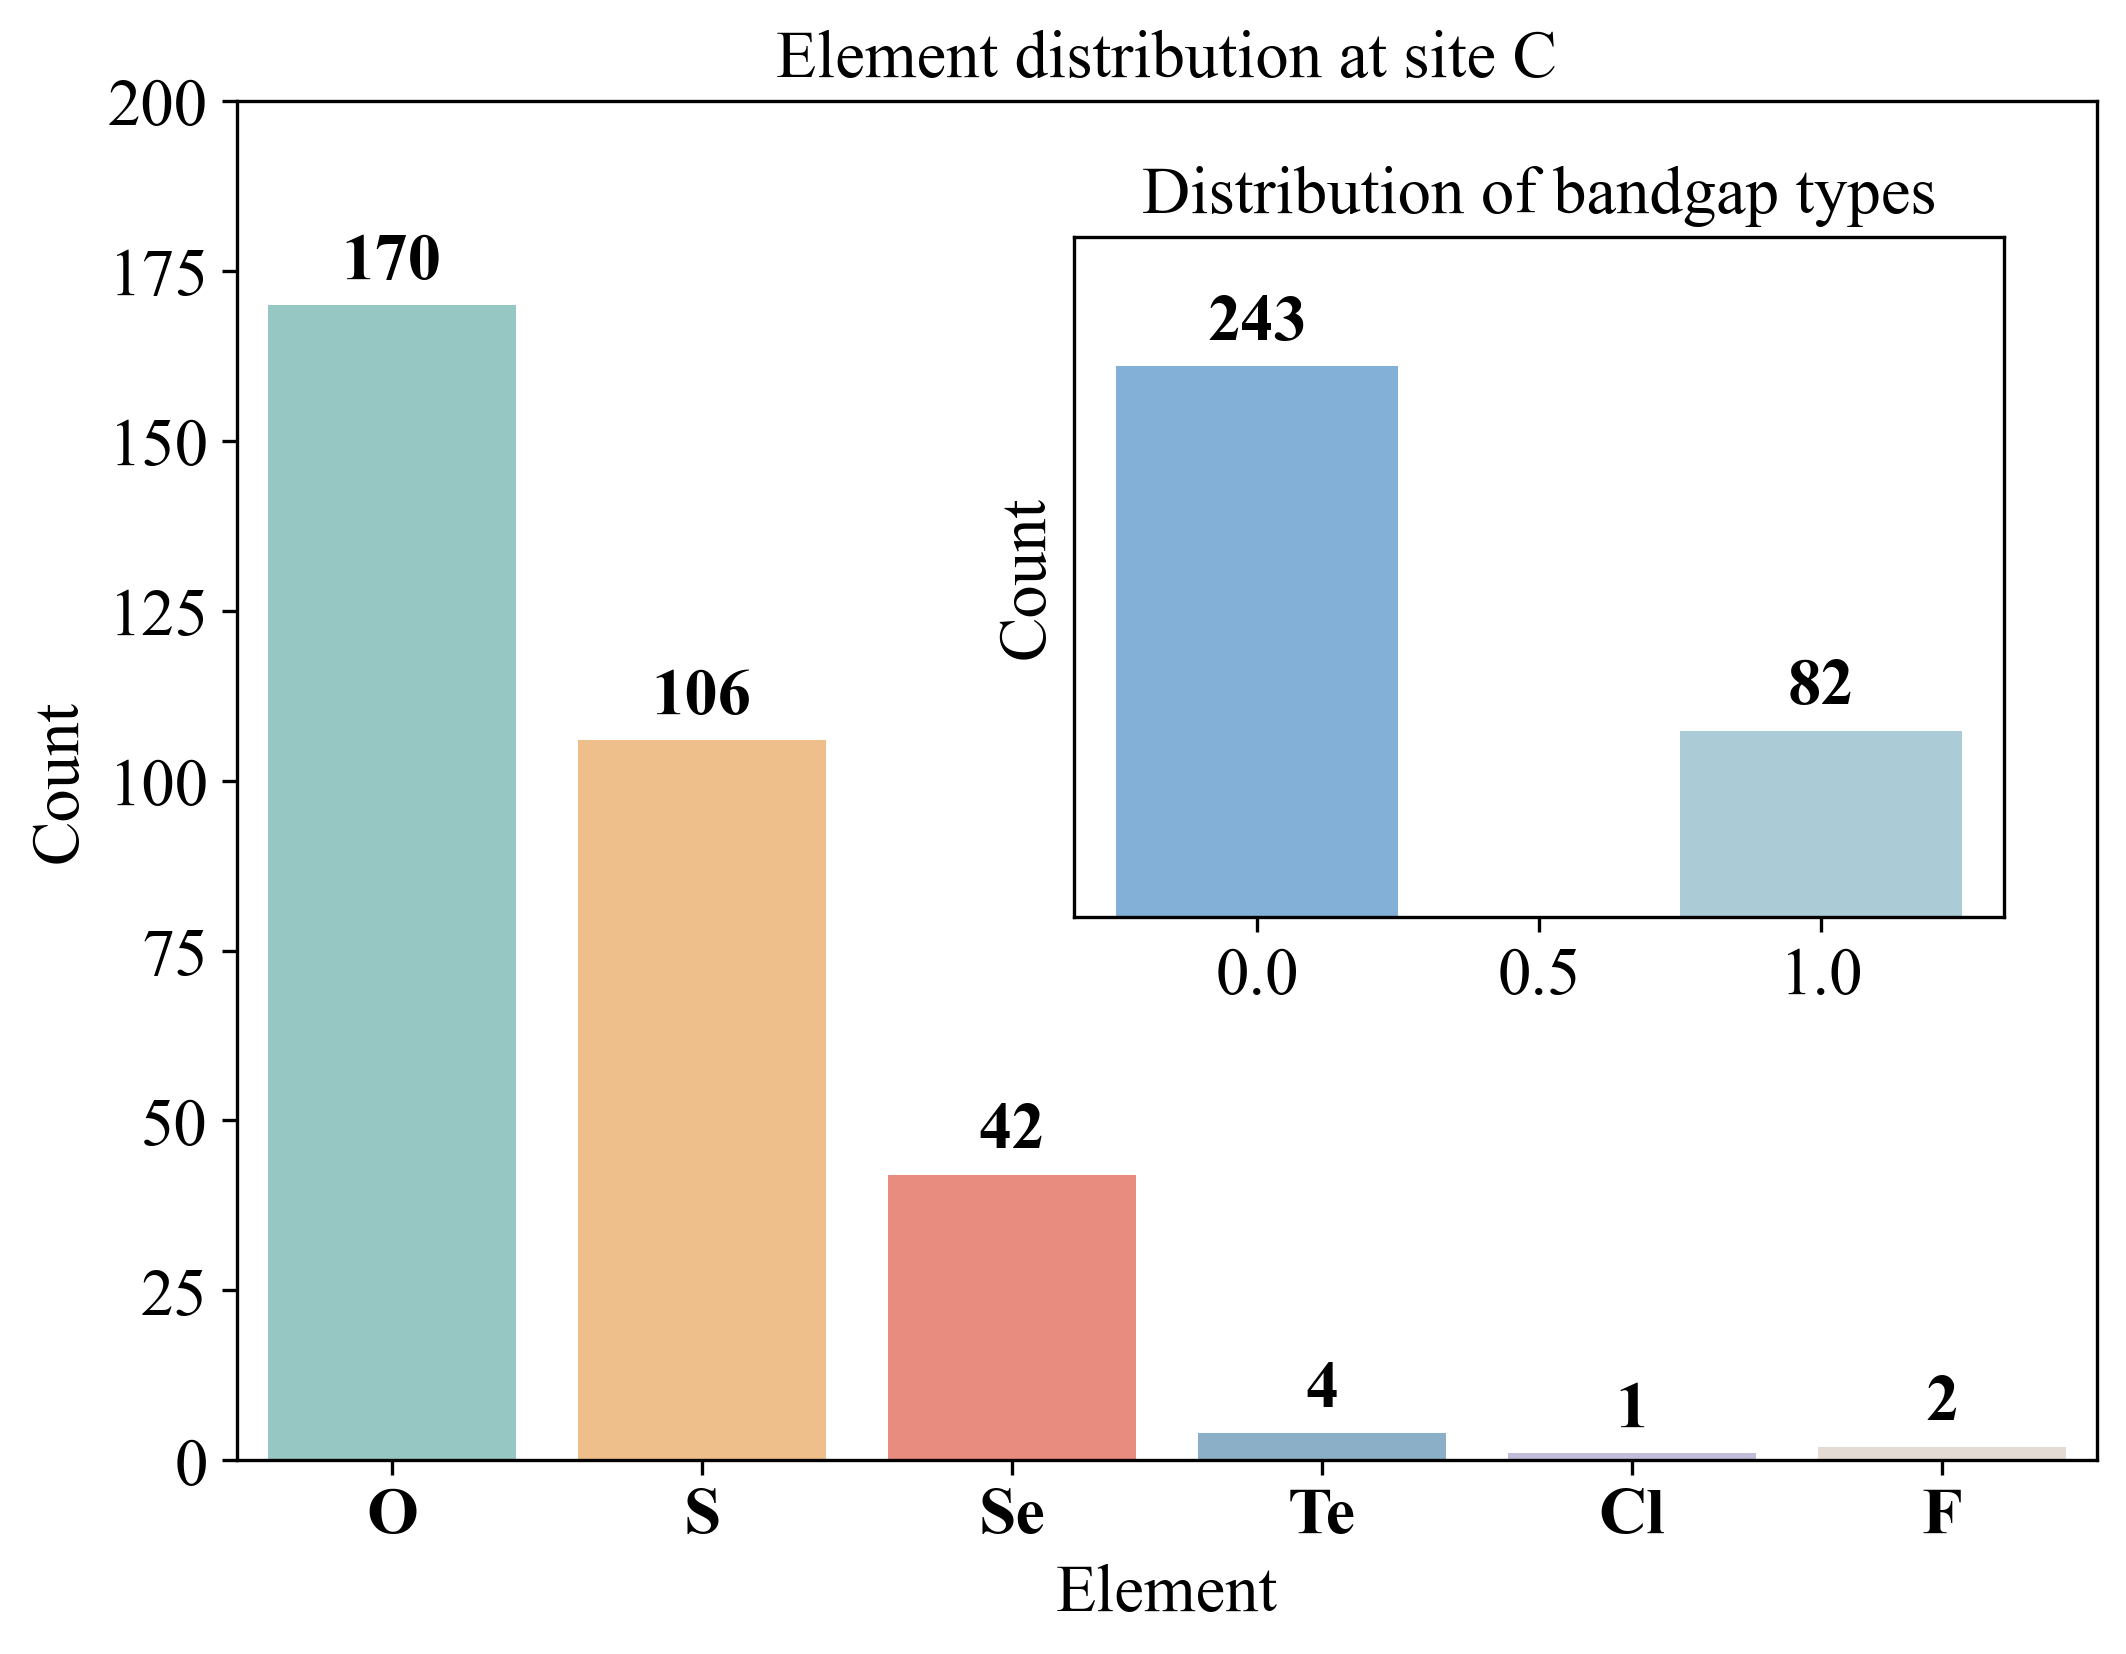

In [9]:
colors = ['#8ECFC9','#FFBE7A','#FA7F6F','#82B0D2', '#BEB8DC', '#E7DAD2']

ax = sns.countplot(x='C', data=spinels, width=0.8, palette=colors)

ax.tick_params(axis='y', labelsize=16)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=16,weight='bold')

ax.set_ylim(0, 200)
ax.set_xlabel(None)
ax.set_ylabel('Count')
ax.set_xlabel('Element')
ax.set_title('Element distribution at site C')
plt.xticks(fontweight='bold')
inset_ratio = 0.5  
ax2 = ax.inset_axes([0.45, 0.4, inset_ratio, inset_ratio])
colors = ['#83b0d7','#abcbd7']
ax2.bar([0,1],spinels[r'$y$'].value_counts().values,color=colors,width=0.5)

for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points',fontsize=16,weight='bold')
ax2.set_ylim(0,300)
ax2.set_xlabel(None)
ax2.set_ylabel('Count')
ax2.set_yticks([])
ax2.set_xticks([0,1],['Indirect','Direct'])
ax2.set_title("Distribution of bandgap types")
plt.show()

In [10]:
modifier = Modifier()
spinels_hse = modifier.modify(spinels['formula'].values,spinels['band gap'].values)
spinels_hse

Generating EDM: 100%|██████████| 325/325 [00:00<00:00, 135677.20formulae/s]


Model architecture: out_dims, d_model, N, heads
3, 512, 3, 4
Running on compute device: cuda:0
Model size: 11992839 parameters

loading data with up to 3 elements in the formula


,formula,band gap,hse,count
0,NaMn2O4,0.0000,0.000000,3
1,Mg2FeO4,0.0000,0.000000,3
2,Gd2CdO4,0.0000,0.000000,3
3,CaIn2O4,2.0208,3.632442,3
4,Si(NiO2)2,3.5770,5.292797,3
...,...,...,...,...
320,Dy2CdTe4,0.0000,0.000000,3
321,Cr2CuTe4,0.0000,0.000000,3
322,Li2ZnCl4,4.1422,5.606470,3
323,LiAg2F4,0.0000,0.000000,3


In [11]:
spinels['hse'] = spinels_hse['hse']
spinels

,formula,$y$,band gap,structure,A,B,C,hse
0,NaMn2O4,False,0.0000,"[[4.229859 4.229859 4.229859] Na, [6.3447885 6...",Na,Mn,O,0.000000
1,Mg2FeO4,False,0.0000,"[[5.31263625 3.18758175 3.18758175] Mg, [5.312...",Fe,Mg,O,0.000000
2,Gd2CdO4,True,0.0000,"[[3.65343075 3.65343075 6.08905125] Gd, [6.089...",Cd,Gd,O,0.000000
3,CaIn2O4,True,2.0208,"[[0.98066019 3.25582617 1.83688805] Ca, [ 2.94...",Ca,In,O,3.632442
4,Si(NiO2)2,True,3.5770,"[[0.81930158 0.57942515 1.41926313] Si, [5.734...",Si,Ni,O,5.292797
...,...,...,...,...,...,...,...,...
320,Dy2CdTe4,False,0.0000,"[[7.90082125 4.74049275 4.74049275] Dy, [4.740...",Cd,Dy,Te,0.000000
321,Cr2CuTe4,False,0.0000,"[[4.57184554 3.23277792 7.91867596] Cr, [4.571...",Cu,Cr,Te,0.000000
322,Li2ZnCl4,False,4.1422,"[[3.85676751 3.85677152 1.28550518] Li, [3.856...",Zn,Li,Cl,5.606470
323,LiAg2F4,False,0.0000,"[[0. 0. 0.] Li, [2.3405165 2.3405165 2.3405165...",Li,Ag,F,0.000000


In [12]:
spinels[['formula','$y$','A','B','C','hse']].to_csv('spinels_abc.csv')

In [13]:
data = Featurizor().featurize(spinels,is_structure=True)
data

MultipleFeaturizer:   0%|          | 0/315 [00:00<?, ?it/s]

SiteStatsFingerprint:   0%|          | 0/315 [00:00<?, ?it/s]

,formula,$y$,$R_c$,$V_a$,$R_a$,$R_b$,$D_a$,$D_b$,$Ce_a$,$Ce_b$,$Ce_c$,$Dp_a$,$Dp_b$,$Fi_b$,$N_b$,$F_a$,$F_b$,$Ns_a$,$Ns_b$,$Np_a$,$Np_b$,$Nd_b$,$(En)diff_{ab}$,$(En)diff_{cb}$,$(En)diff_{ca}$,$o$,HOMO_character,HOMO_element,HOMO_energy,LUMO_character,LUMO_element,gap_AO,mean Voro_index_3,mean Voro_index_4,mean Voro_index_5,mean Voro_index_6,mean Voro_index_8,mean Voro_index_9
0,NaMn2O4,0,1.40,1,0.9900,0.59,0.971,7.44,1.113,2.92,2.62,162.7,68.0,717.3,25,1,4,1,2,0,0,5,0.62,1.89,2.51,0.421429,3,25,-0.266540,3,25,0.000000,5.142857,3.428571,0.0,2.285714,0.0,0.0
1,Mg2FeO4,0,1.40,4,0.4239,0.72,7.870,1.74,4.280,1.51,2.62,62.0,71.2,737.7,12,4,2,2,2,0,0,0,0.52,2.13,1.61,0.514286,3,26,-0.295049,3,26,0.000000,5.142857,3.428571,0.0,2.285714,0.0,0.0
2,Gd2CdO4,1,1.40,2,0.7800,0.94,8.690,7.90,1.160,4.14,2.62,46.0,158.0,593.4,64,4,3,2,2,0,0,1,0.49,2.24,1.75,0.671429,2,8,-0.338381,2,8,0.000000,5.142857,3.428571,0.0,2.285714,0.0,0.0
3,CaIn2O4,1,1.40,2,0.8608,0.80,1.540,7.31,1.840,2.52,2.62,160.8,65.0,558.3,49,2,5,2,2,0,1,10,0.78,1.66,2.44,0.571429,2,8,-0.338381,1,49,0.047884,5.142857,3.428571,0.0,2.285714,0.0,0.0
4,Si(NiO2)2,1,1.40,4,0.2600,0.69,2.330,8.91,4.630,4.44,2.62,37.3,49.0,737.1,28,6,4,2,2,2,0,8,0.01,1.53,1.54,0.492857,2,8,-0.338381,2,8,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,Ho2CdSe4,1,1.98,2,0.7800,0.90,8.690,8.80,1.160,3.14,2.46,46.0,156.0,581.0,67,4,3,2,2,0,0,0,0.46,1.32,0.86,0.454545,2,34,-0.245806,2,34,0.000000,5.142857,3.428571,0.0,2.285714,0.0,0.0
311,Al2CdSe4,0,1.98,2,0.7800,0.54,8.690,2.70,1.160,3.39,2.46,46.0,57.8,577.5,13,4,5,2,2,0,1,0,0.08,0.94,0.86,0.272727,2,34,-0.245806,2,34,0.000000,5.142857,3.428571,0.0,2.285714,0.0,0.0
312,Yb2MnSe4,0,1.98,2,0.6600,0.87,7.440,6.97,2.920,1.60,2.46,68.0,139.0,603.4,70,4,3,2,2,0,0,0,0.45,1.45,1.00,0.439394,2,34,-0.245806,2,34,0.000000,5.142857,3.428571,0.0,2.285714,0.0,0.0
313,Mg(CrSe2)2,0,1.98,2,0.5700,0.62,1.740,7.15,1.510,4.10,2.46,71.2,83.0,652.9,24,2,4,2,1,0,0,5,0.35,0.89,1.24,0.313131,1,24,-0.150445,3,24,0.032322,5.142857,3.428571,0.0,2.285714,0.0,0.0


In [14]:
y = data[r'$y$']
X = data.drop(columns=['formula',r'$y$'])

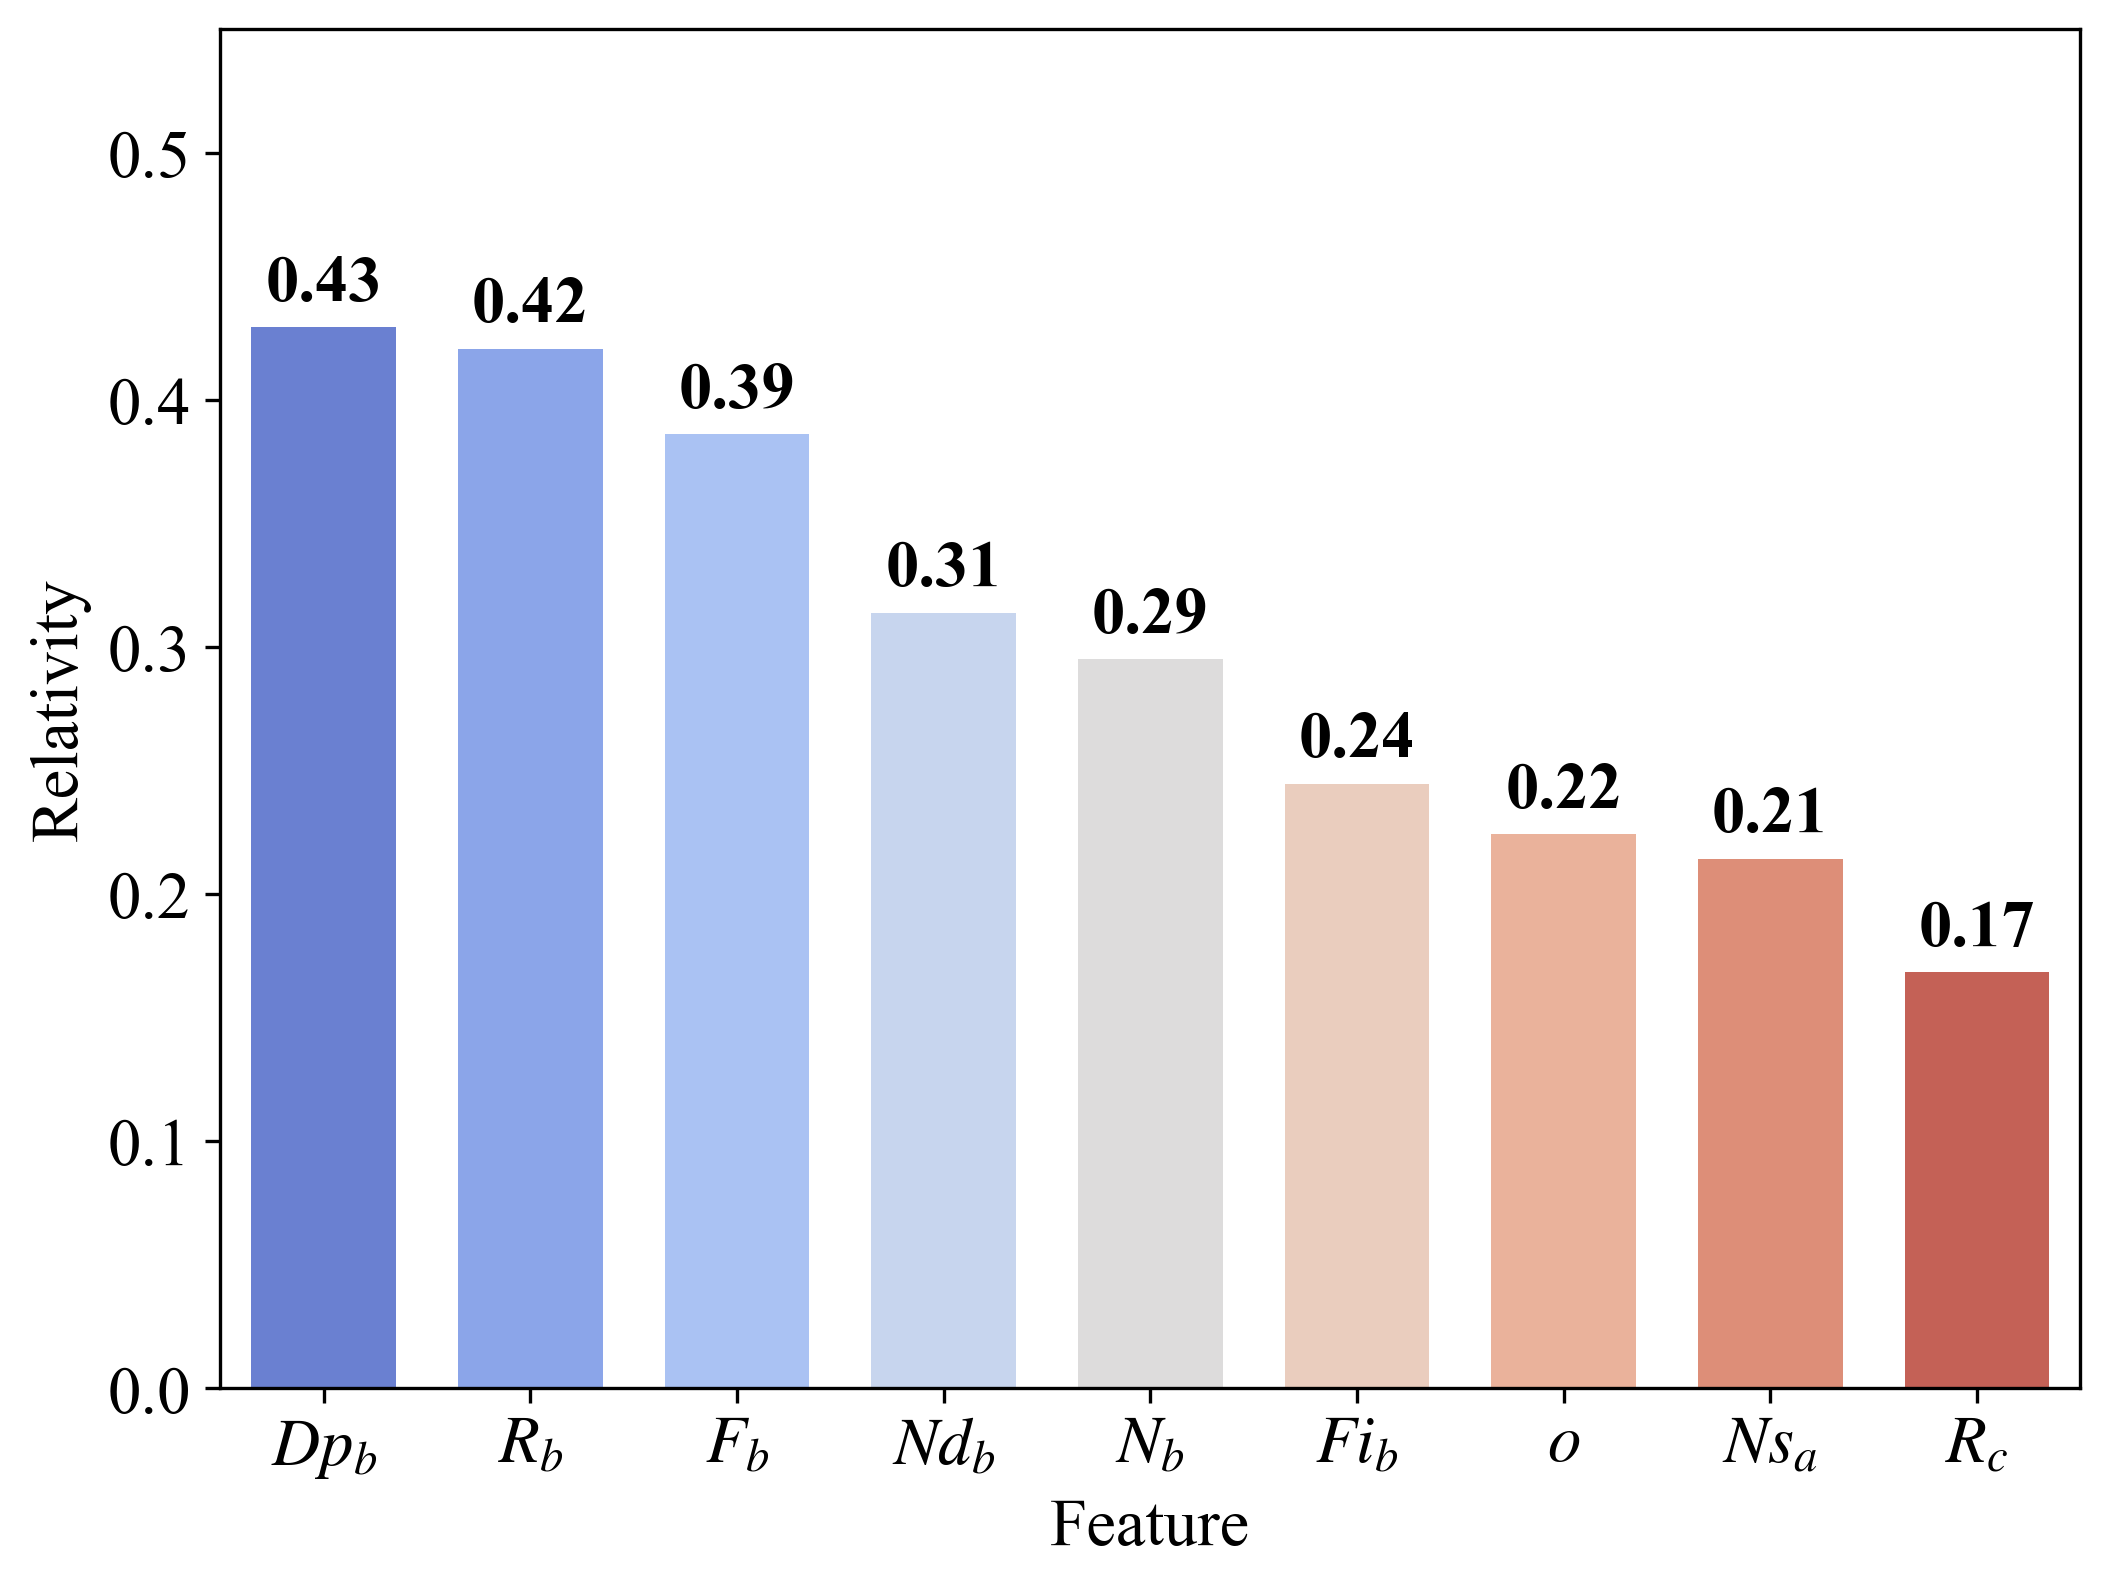

In [15]:
colors = ['#19CAAD','#8CC7B5','#A0EEE1','#BEE7E9','#BEEDC7','#D6D5B7','#D1BA74','#E6CEAC','#ECAD9E','#F4606C']
corr_y = pd.concat([X,y],axis=1).corr()[r'$y$'].abs().sort_values(ascending=False)[1:10]
ax = sns.barplot(x=corr_y.index, y=corr_y.values, width=0.7,palette='coolwarm')

ax.tick_params(axis='x', labelsize=16)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=16,weight='bold')

plt.ylim(0, 0.55)
plt.ylabel('Relativity')
plt.xlabel('Feature')
plt.xticks(fontweight='bold')
plt.show()

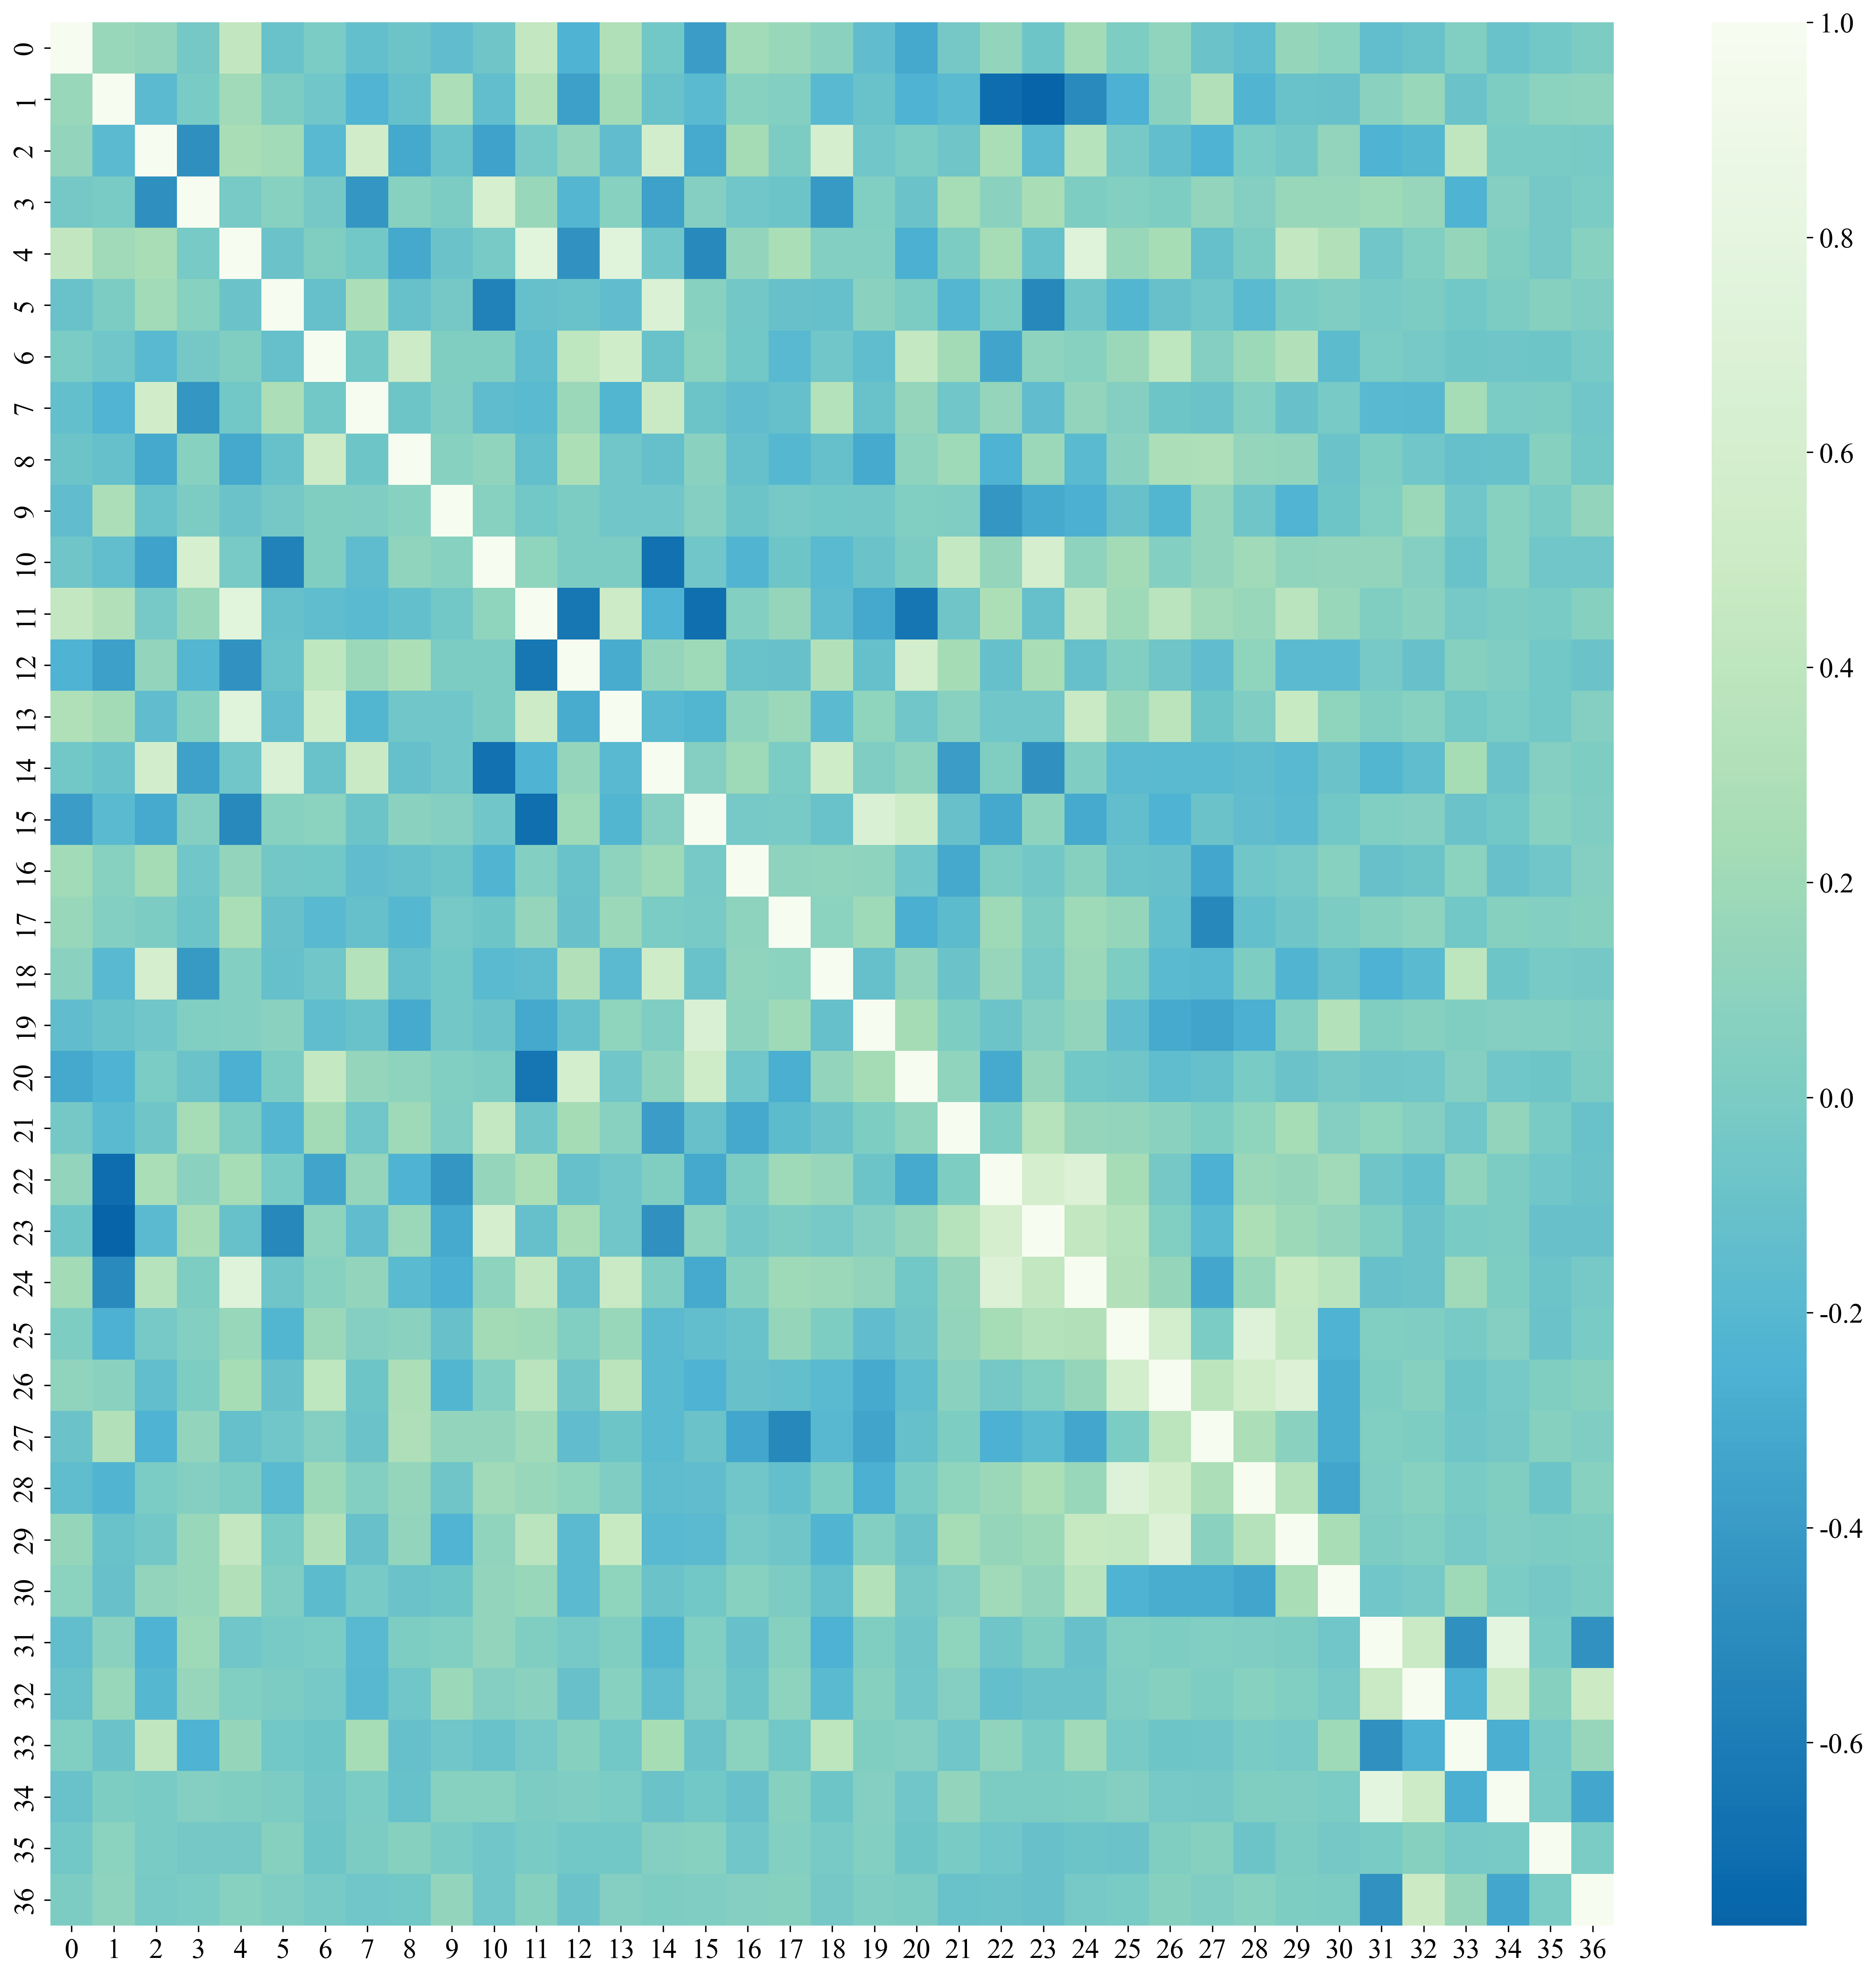

In [16]:
plt.figure(figsize=(20,20), dpi= 300)
sns.heatmap(data.corr().values, 
            cmap='GnBu_r', center=0, annot=False,annot_kws={'size': 12})
plt.show()

In [17]:
data.corr().to_csv("feature_corr.csv")

In [18]:
data['formula'] = data['formula'].map(lambda x : Composition(x).reduced_formula)
spinels['formula'] = spinels['formula'].map(lambda x : Composition(x).reduced_formula)

In [19]:
intersection_df = pd.merge(data, spinels,on='formula', how='inner')
intersection_df

,formula,$y$_x,$R_c$,$V_a$,$R_a$,$R_b$,$D_a$,$D_b$,$Ce_a$,$Ce_b$,$Ce_c$,$Dp_a$,$Dp_b$,$Fi_b$,$N_b$,$F_a$,$F_b$,$Ns_a$,$Ns_b$,$Np_a$,$Np_b$,$Nd_b$,$(En)diff_{ab}$,$(En)diff_{cb}$,$(En)diff_{ca}$,$o$,HOMO_character,HOMO_element,HOMO_energy,LUMO_character,LUMO_element,gap_AO,mean Voro_index_3,mean Voro_index_4,mean Voro_index_5,mean Voro_index_6,mean Voro_index_8,mean Voro_index_9,$y$_y,band gap,structure,A,B,C,hse
0,NaMn2O4,0,1.40,1,0.9900,0.59,0.971,7.44,1.113,2.92,2.62,162.7,68.0,717.3,25,1,4,1,2,0,0,5,0.62,1.89,2.51,0.421429,3,25,-0.266540,3,25,0.000000,5.142857,3.428571,0.0,2.285714,0.0,0.0,False,0.0000,"[[4.229859 4.229859 4.229859] Na, [6.3447885 6...",Na,Mn,O,0.000000
1,Mg2FeO4,0,1.40,4,0.4239,0.72,7.870,1.74,4.280,1.51,2.62,62.0,71.2,737.7,12,4,2,2,2,0,0,0,0.52,2.13,1.61,0.514286,3,26,-0.295049,3,26,0.000000,5.142857,3.428571,0.0,2.285714,0.0,0.0,False,0.0000,"[[5.31263625 3.18758175 3.18758175] Mg, [5.312...",Fe,Mg,O,0.000000
2,Gd2CdO4,1,1.40,2,0.7800,0.94,8.690,7.90,1.160,4.14,2.62,46.0,158.0,593.4,64,4,3,2,2,0,0,1,0.49,2.24,1.75,0.671429,2,8,-0.338381,2,8,0.000000,5.142857,3.428571,0.0,2.285714,0.0,0.0,True,0.0000,"[[3.65343075 3.65343075 6.08905125] Gd, [6.089...",Cd,Gd,O,0.000000
3,CaIn2O4,1,1.40,2,0.8608,0.80,1.540,7.31,1.840,2.52,2.62,160.8,65.0,558.3,49,2,5,2,2,0,1,10,0.78,1.66,2.44,0.571429,2,8,-0.338381,1,49,0.047884,5.142857,3.428571,0.0,2.285714,0.0,0.0,True,2.0208,"[[0.98066019 3.25582617 1.83688805] Ca, [ 2.94...",Ca,In,O,3.632442
4,Si(NiO2)2,1,1.40,4,0.2600,0.69,2.330,8.91,4.630,4.44,2.62,37.3,49.0,737.1,28,6,4,2,2,2,0,8,0.01,1.53,1.54,0.492857,2,8,-0.338381,2,8,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,True,3.5770,"[[0.81930158 0.57942515 1.41926313] Si, [5.734...",Si,Ni,O,5.292797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,Ho2CdSe4,1,1.98,2,0.7800,0.90,8.690,8.80,1.160,3.14,2.46,46.0,156.0,581.0,67,4,3,2,2,0,0,0,0.46,1.32,0.86,0.454545,2,34,-0.245806,2,34,0.000000,5.142857,3.428571,0.0,2.285714,0.0,0.0,True,0.6037,"[[4.38295506 4.38284292 7.30491201] Ho, [4.382...",Cd,Ho,Se,1.414513
311,Al2CdSe4,0,1.98,2,0.7800,0.54,8.690,2.70,1.160,3.39,2.46,46.0,57.8,577.5,13,4,5,2,2,0,1,0,0.08,0.94,0.86,0.272727,2,34,-0.245806,2,34,0.000000,5.142857,3.428571,0.0,2.285714,0.0,0.0,False,1.7412,[[3.32039146e+00 5.00000000e-09 5.75108655e+00...,Cd,Al,Se,2.758612
312,Yb2MnSe4,0,1.98,2,0.6600,0.87,7.440,6.97,2.920,1.60,2.46,68.0,139.0,603.4,70,4,3,2,2,0,0,0,0.45,1.45,1.00,0.439394,2,34,-0.245806,2,34,0.000000,5.142857,3.428571,0.0,2.285714,0.0,0.0,False,0.0000,"[[1.43432 1.43432 1.43432] Yb, [4.30296 4.3029...",Mn,Yb,Se,0.000000
313,Mg(CrSe2)2,0,1.98,2,0.5700,0.62,1.740,7.15,1.510,4.10,2.46,71.2,83.0,652.9,24,2,4,2,1,0,0,5,0.35,0.89,1.24,0.313131,1,24,-0.150445,3,24,0.032322,5.142857,3.428571,0.0,2.285714,0.0,0.0,False,0.6322,"[[2.6793852 2.6793852 2.6793852] Mg, [0. 0. 0....",Mg,Cr,Se,1.556447


In [20]:
intersection_df = intersection_df.rename(columns={'$y$_x':r'$y$'})
intersection_df

,formula,$y$,$R_c$,$V_a$,$R_a$,$R_b$,$D_a$,$D_b$,$Ce_a$,$Ce_b$,$Ce_c$,$Dp_a$,$Dp_b$,$Fi_b$,$N_b$,$F_a$,$F_b$,$Ns_a$,$Ns_b$,$Np_a$,$Np_b$,$Nd_b$,$(En)diff_{ab}$,$(En)diff_{cb}$,$(En)diff_{ca}$,$o$,HOMO_character,HOMO_element,HOMO_energy,LUMO_character,LUMO_element,gap_AO,mean Voro_index_3,mean Voro_index_4,mean Voro_index_5,mean Voro_index_6,mean Voro_index_8,mean Voro_index_9,$y$_y,band gap,structure,A,B,C,hse
0,NaMn2O4,0,1.40,1,0.9900,0.59,0.971,7.44,1.113,2.92,2.62,162.7,68.0,717.3,25,1,4,1,2,0,0,5,0.62,1.89,2.51,0.421429,3,25,-0.266540,3,25,0.000000,5.142857,3.428571,0.0,2.285714,0.0,0.0,False,0.0000,"[[4.229859 4.229859 4.229859] Na, [6.3447885 6...",Na,Mn,O,0.000000
1,Mg2FeO4,0,1.40,4,0.4239,0.72,7.870,1.74,4.280,1.51,2.62,62.0,71.2,737.7,12,4,2,2,2,0,0,0,0.52,2.13,1.61,0.514286,3,26,-0.295049,3,26,0.000000,5.142857,3.428571,0.0,2.285714,0.0,0.0,False,0.0000,"[[5.31263625 3.18758175 3.18758175] Mg, [5.312...",Fe,Mg,O,0.000000
2,Gd2CdO4,1,1.40,2,0.7800,0.94,8.690,7.90,1.160,4.14,2.62,46.0,158.0,593.4,64,4,3,2,2,0,0,1,0.49,2.24,1.75,0.671429,2,8,-0.338381,2,8,0.000000,5.142857,3.428571,0.0,2.285714,0.0,0.0,True,0.0000,"[[3.65343075 3.65343075 6.08905125] Gd, [6.089...",Cd,Gd,O,0.000000
3,CaIn2O4,1,1.40,2,0.8608,0.80,1.540,7.31,1.840,2.52,2.62,160.8,65.0,558.3,49,2,5,2,2,0,1,10,0.78,1.66,2.44,0.571429,2,8,-0.338381,1,49,0.047884,5.142857,3.428571,0.0,2.285714,0.0,0.0,True,2.0208,"[[0.98066019 3.25582617 1.83688805] Ca, [ 2.94...",Ca,In,O,3.632442
4,Si(NiO2)2,1,1.40,4,0.2600,0.69,2.330,8.91,4.630,4.44,2.62,37.3,49.0,737.1,28,6,4,2,2,2,0,8,0.01,1.53,1.54,0.492857,2,8,-0.338381,2,8,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,True,3.5770,"[[0.81930158 0.57942515 1.41926313] Si, [5.734...",Si,Ni,O,5.292797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,Ho2CdSe4,1,1.98,2,0.7800,0.90,8.690,8.80,1.160,3.14,2.46,46.0,156.0,581.0,67,4,3,2,2,0,0,0,0.46,1.32,0.86,0.454545,2,34,-0.245806,2,34,0.000000,5.142857,3.428571,0.0,2.285714,0.0,0.0,True,0.6037,"[[4.38295506 4.38284292 7.30491201] Ho, [4.382...",Cd,Ho,Se,1.414513
311,Al2CdSe4,0,1.98,2,0.7800,0.54,8.690,2.70,1.160,3.39,2.46,46.0,57.8,577.5,13,4,5,2,2,0,1,0,0.08,0.94,0.86,0.272727,2,34,-0.245806,2,34,0.000000,5.142857,3.428571,0.0,2.285714,0.0,0.0,False,1.7412,[[3.32039146e+00 5.00000000e-09 5.75108655e+00...,Cd,Al,Se,2.758612
312,Yb2MnSe4,0,1.98,2,0.6600,0.87,7.440,6.97,2.920,1.60,2.46,68.0,139.0,603.4,70,4,3,2,2,0,0,0,0.45,1.45,1.00,0.439394,2,34,-0.245806,2,34,0.000000,5.142857,3.428571,0.0,2.285714,0.0,0.0,False,0.0000,"[[1.43432 1.43432 1.43432] Yb, [4.30296 4.3029...",Mn,Yb,Se,0.000000
313,Mg(CrSe2)2,0,1.98,2,0.5700,0.62,1.740,7.15,1.510,4.10,2.46,71.2,83.0,652.9,24,2,4,2,1,0,0,5,0.35,0.89,1.24,0.313131,1,24,-0.150445,3,24,0.032322,5.142857,3.428571,0.0,2.285714,0.0,0.0,False,0.6322,"[[2.6793852 2.6793852 2.6793852] Mg, [0. 0. 0....",Mg,Cr,Se,1.556447


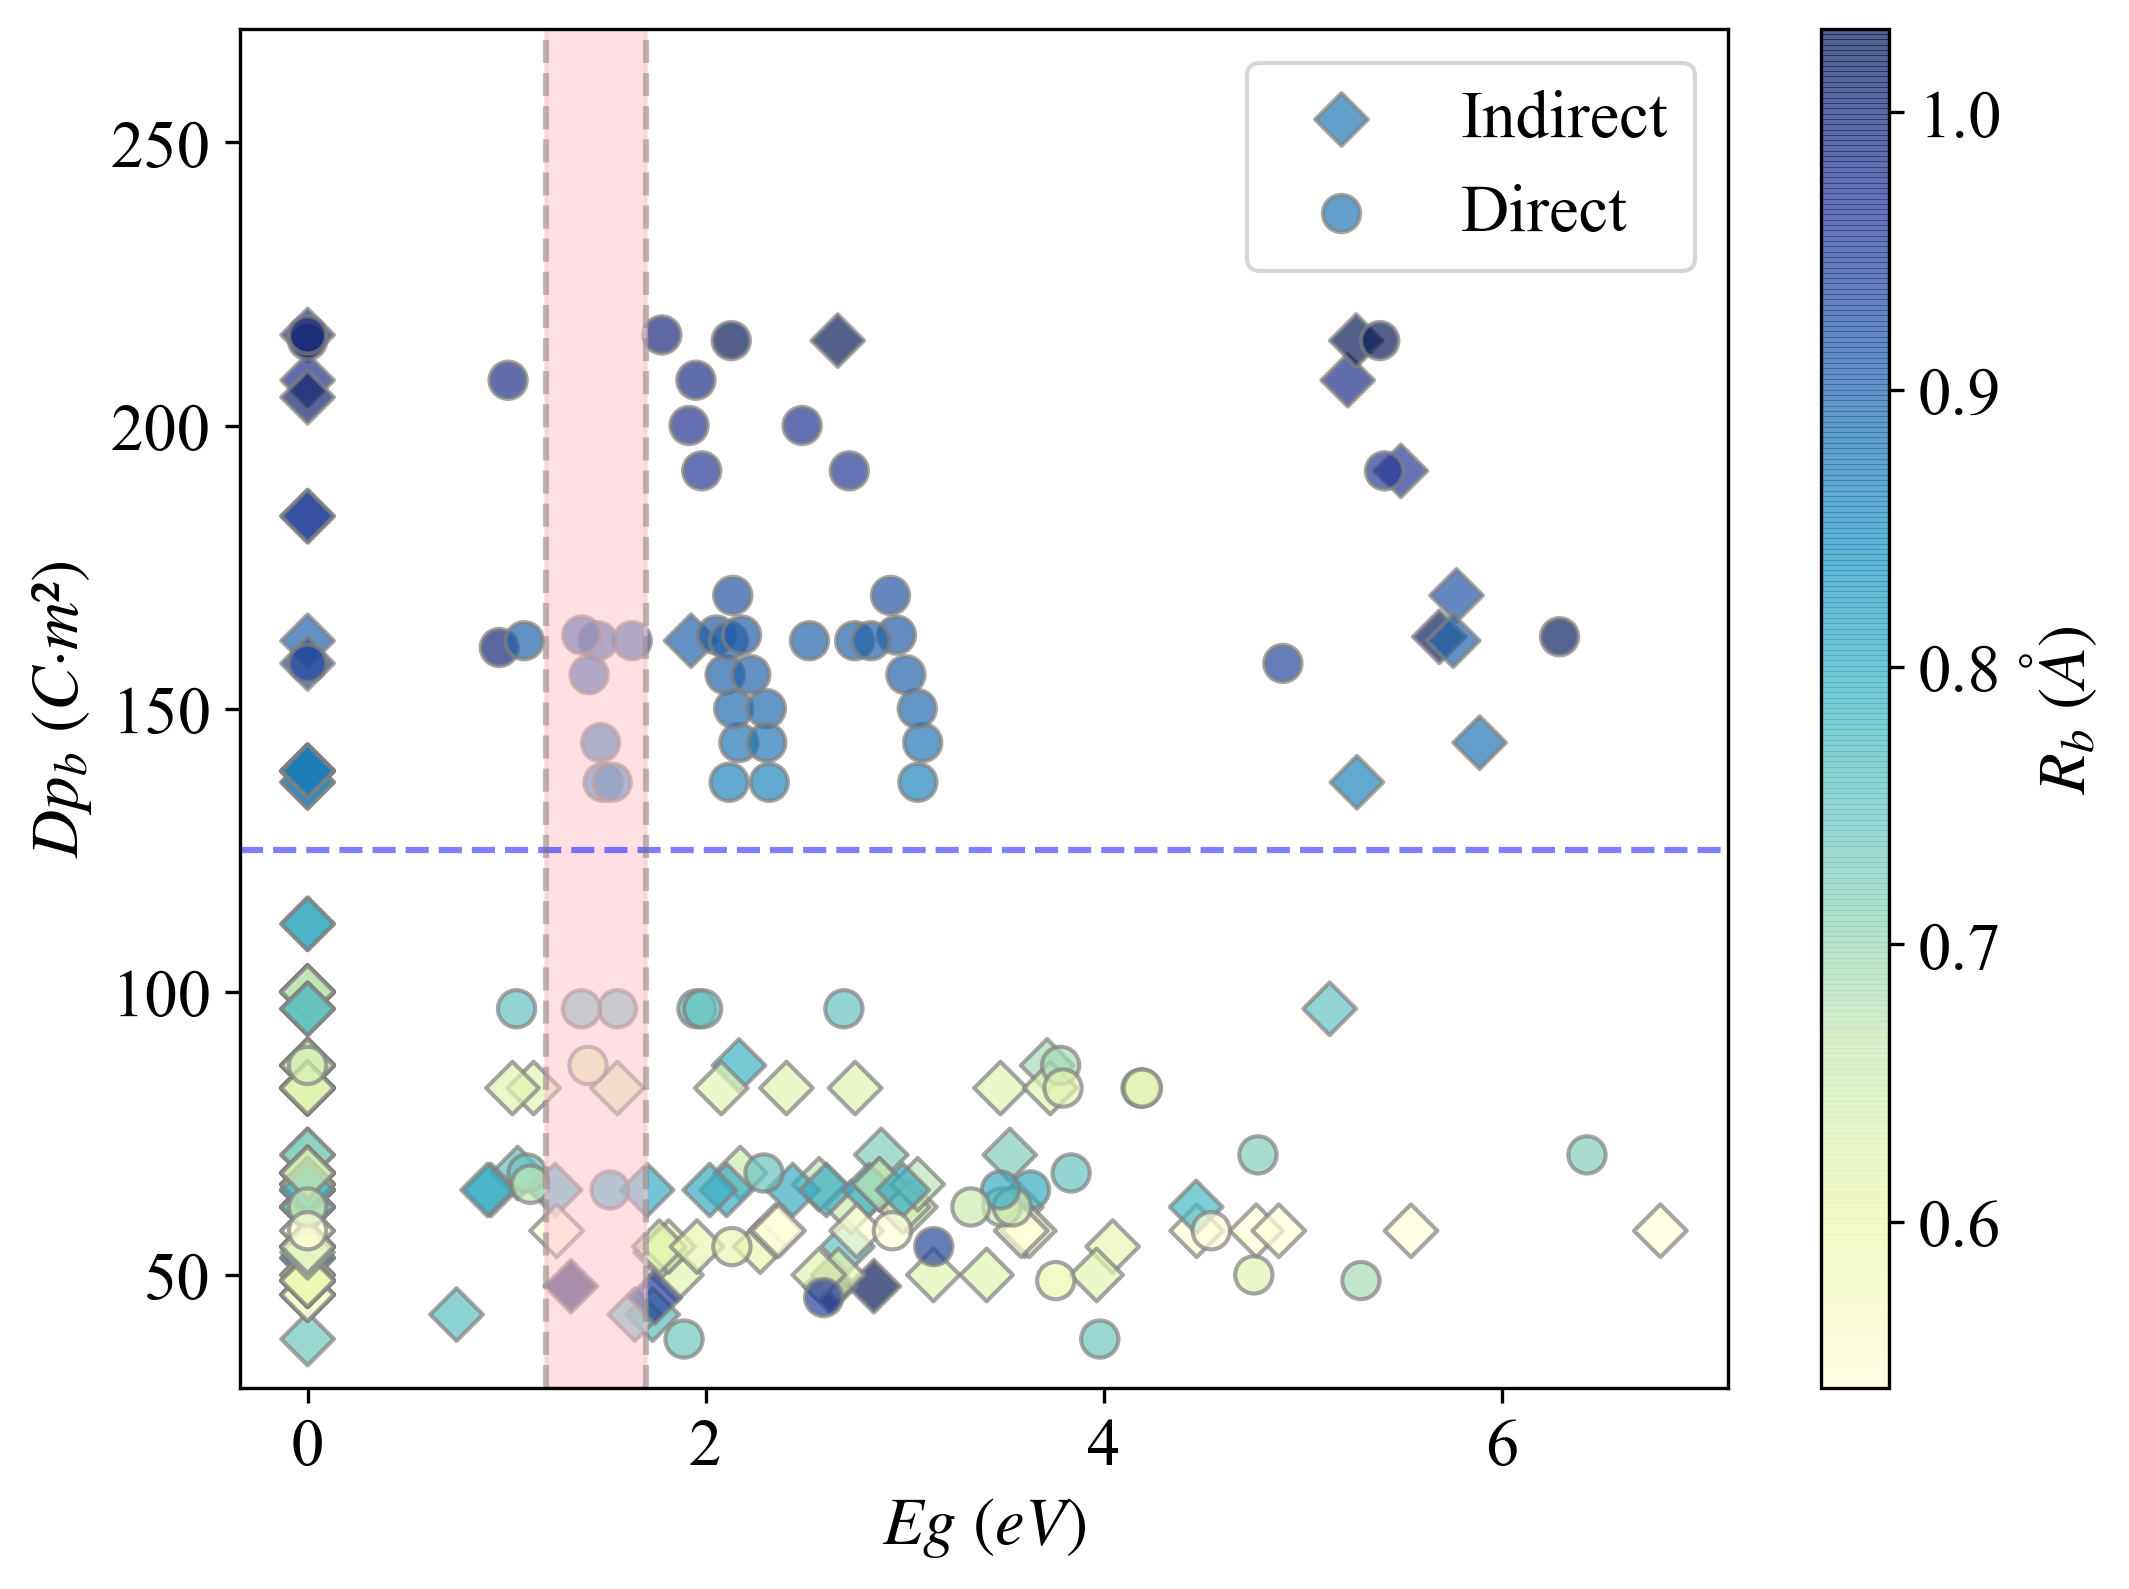

In [21]:
markers = {'Direct':'o', 'Indirect':'D'}
for sp in intersection_df['$y$'].unique():
    tmp_df = intersection_df[intersection_df['$y$']==sp]
    if sp == 0:
        sp = 'Indirect'
    else:
        sp = 'Direct'
    scatter = plt.scatter(tmp_df['hse'],tmp_df['$Dp_b$'],s=80,c=tmp_df['$R_b$'],cmap='YlGnBu',
                marker=markers[sp],label=sp, alpha=0.7,edgecolors='grey')
colorbar = plt.colorbar(scatter)
colorbar.set_label('$R_b$'+' '+'$(Å)$')
plt.axhline(y=125, color='blue', linestyle='--',alpha=0.5)
plt.axvspan(1.2, 1.7, alpha=0.5, color='pink')
plt.axvline(x=1.2, color='grey', linestyle='--',alpha=0.5)
plt.axvline(x=1.7, color='grey', linestyle='--',alpha=0.5)
plt.legend()
plt.ylabel('$Dp_b$'+' '+"$(C·m²)$")
plt.xlabel('$Eg$'+' '+'$(eV)$')
plt.ylim(30,270)
plt.show()

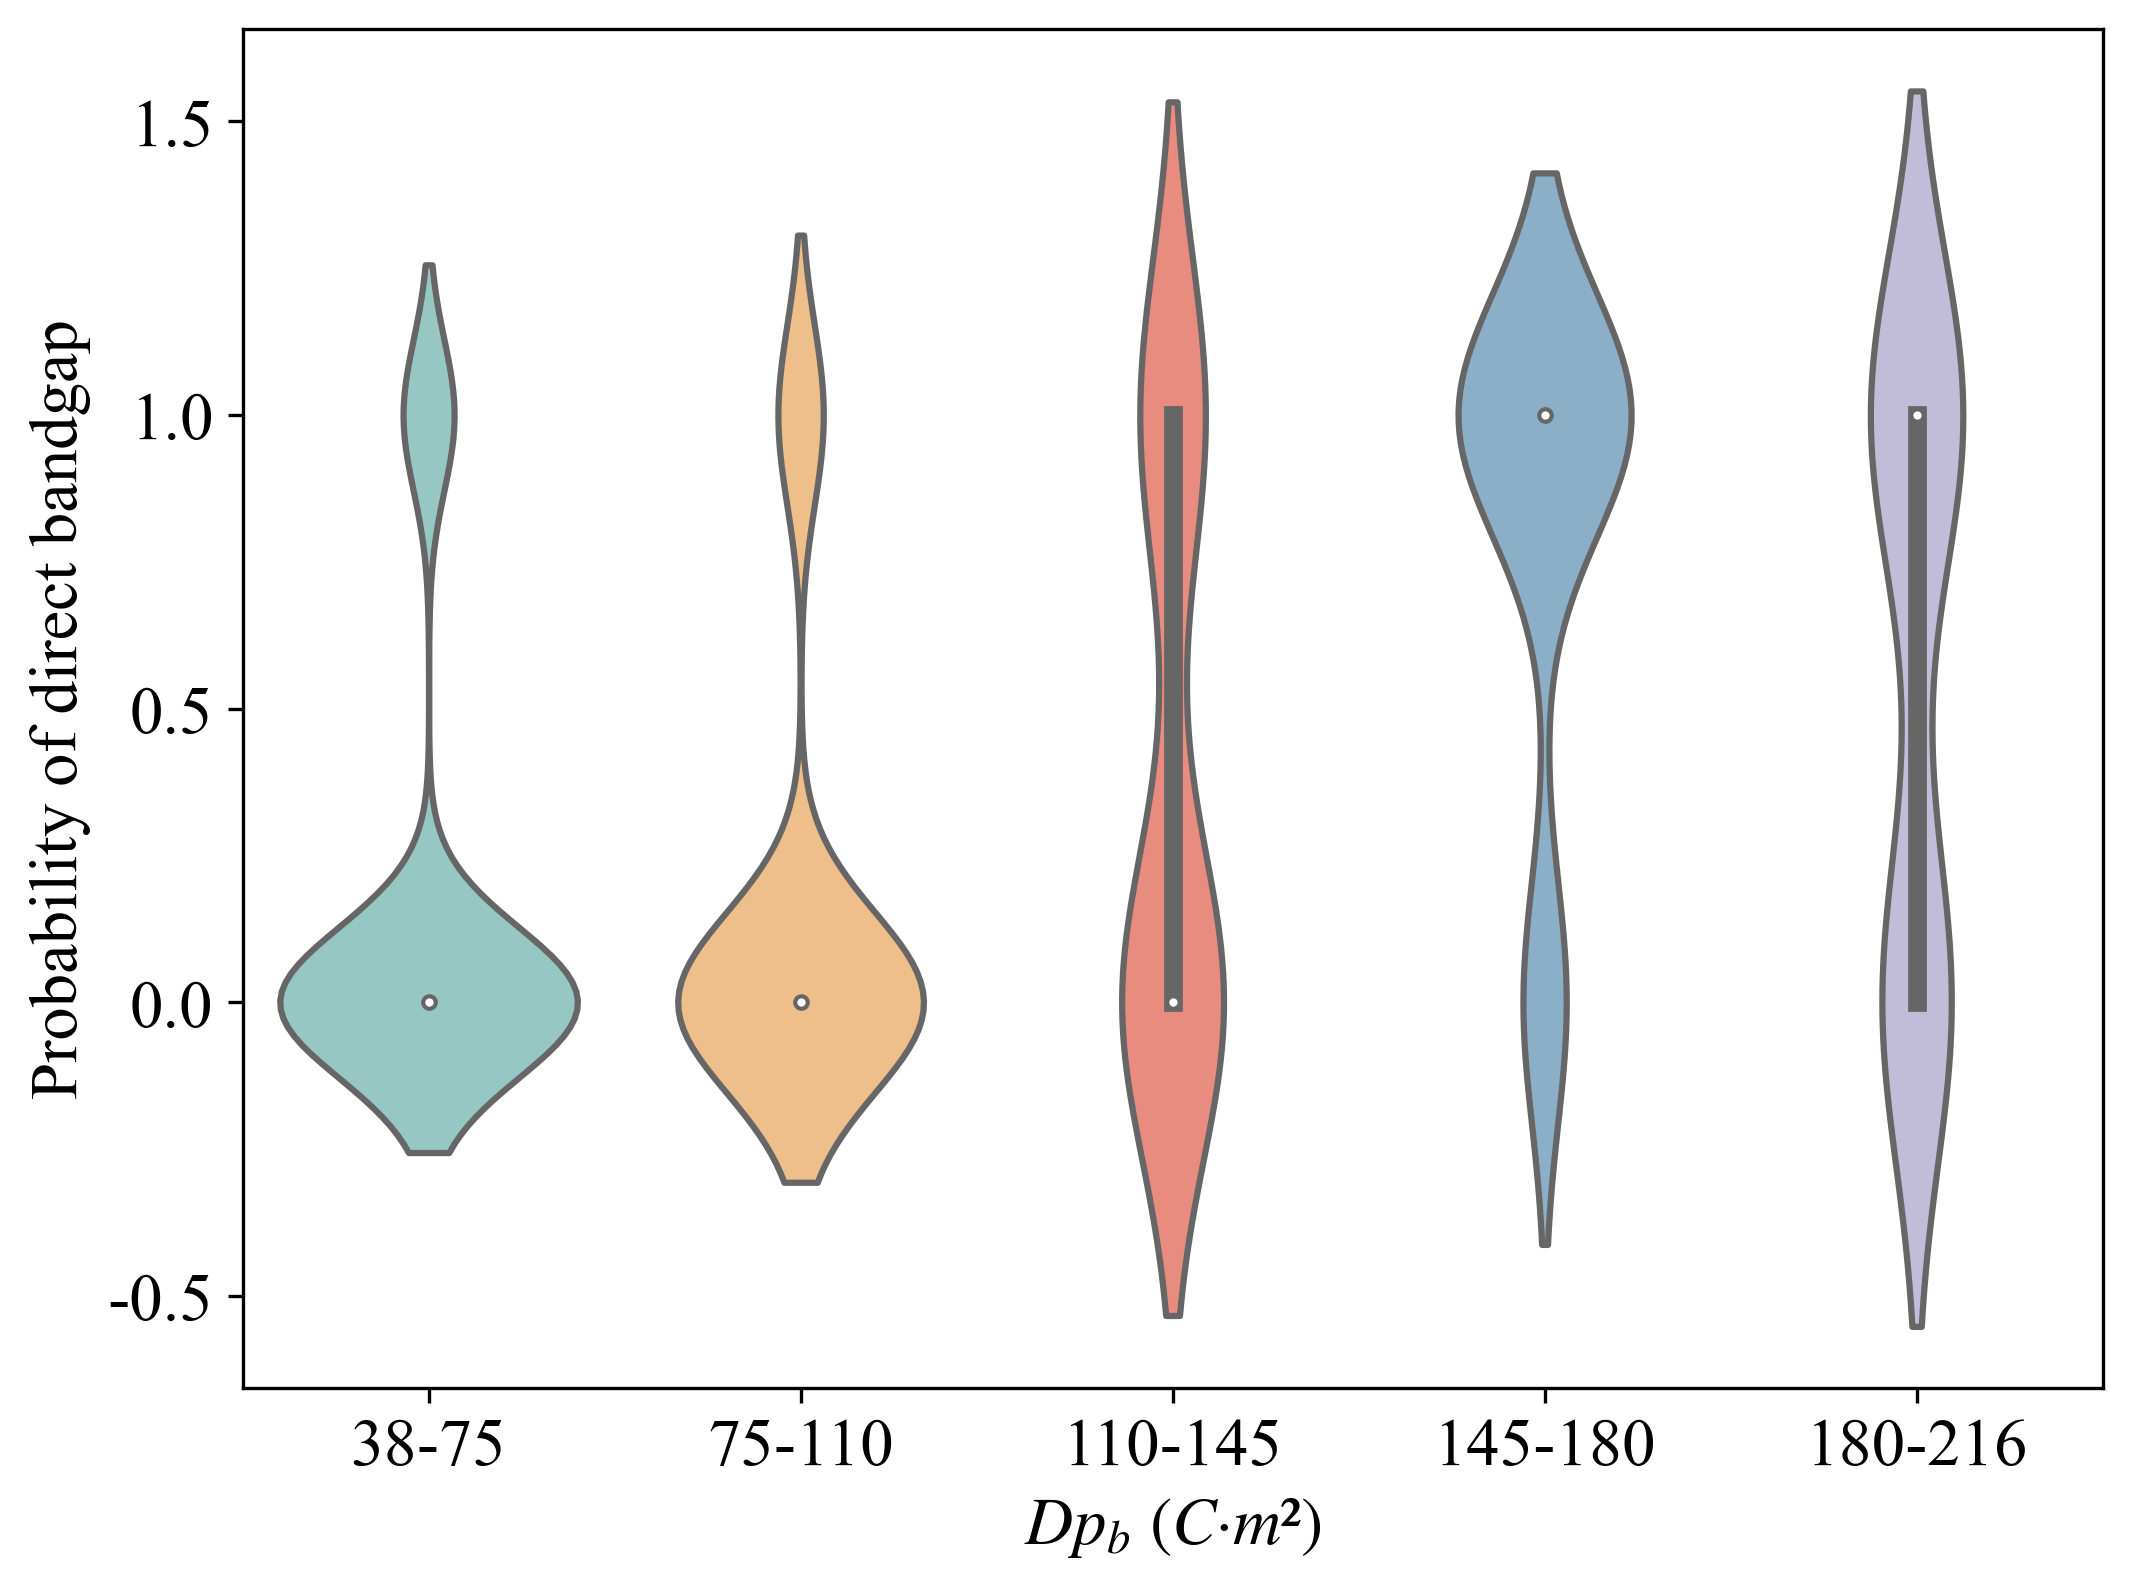

In [ ]:
column_to_bin = corr_y.index[0]
num_bins = 5
colors = ['#8ECFC9','#FFBE7A','#FA7F6F','#82B0D2', '#BEB8DC']

data[column_to_bin+'_cut'] = pd.cut(data[column_to_bin], bins=num_bins)
x=data[column_to_bin+'_cut']
data = data.drop(columns=[column_to_bin+'_cut'])
sns.violinplot(x=x, y=y, fill=True, cbar=True,palette=colors)
plt.xticks([0,1,2,3,4],['38-75','75-110','110-145','145-180','180-216'],rotation=0,fontsize=16)
plt.xlabel(column_to_bin)
plt.ylabel('Probability of direct bandgap')
plt.xlabel('$Dp_b$'+' '+"$(C·m²)$")
plt.show()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)
y_test.value_counts()

0    71
1    33
Name: $y$, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model =  RandomForestClassifier(n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89        71
           1       0.81      0.67      0.73        33

    accuracy                           0.85       104
   macro avg       0.84      0.80      0.81       104
weighted avg       0.84      0.85      0.84       104



In [25]:
def get_f1(data):
    return data['$Ve_b$']-data['$F_b$']+data['$Ns_a$']-data['$Nd_b$']
def get_f2(data):
    return 1/(data['$Nd_b$']+data['$Ns_a$'])+np.log(data['$R_b$'])
tmp_data = Featurizor().featurize(spinels,is_structure=False,is_new_data=True)
factor1 = get_f1(tmp_data)
factor2 = get_f2(tmp_data)
factor = pd.concat([factor1,factor2],axis=1)
factor

MultipleFeaturizer:   0%|          | 0/315 [00:00<?, ?it/s]

,0,1
0,-1,-0.360966
1,2,0.171496
2,1,0.271458
3,-10,-0.139810
4,0,-0.271064
...,...,...
310,2,0.394639
311,0,-0.116186
312,2,0.360738
313,-1,-0.335179


In [26]:
factor_train = factor.iloc[X_train.index,:].reset_index(drop=True)
factor_test = factor.iloc[X_test.index,:].reset_index(drop=True)
factor_train.to_csv('factor_train.csv')
factor_test.to_csv('factor_test.csv')

# Feature selection

In [27]:
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
import catboost
import xgboost
from sklearn.ensemble import GradientBoostingClassifier

In [28]:
rf = RandomForestClassifier(n_jobs=-1, random_state=seed)
lgbm = LGBMClassifier(random_state=seed)
ext = ExtraTreesClassifier(random_state=seed, n_jobs=-1)
lr = LogisticRegression(random_state=seed, n_jobs=-1)
xb = xgboost.XGBClassifier(random_state=seed)
cb = catboost.CatBoostClassifier(random_state=seed, thread_count=-1, verbose=0)
gb = GradientBoostingClassifier(random_state=seed, verbose=0)

In [29]:
names = [
            "Random Forest",
            'LGBM',
            "Logistic Regression",
            "ExtraTrees",
            "XGBoost",
            "GradientBoost",
            "CatBoost"
        ]
classifiers = [
            rf,
            lgbm,
            lr,
            ext,
            xb,
            gb,
            cb
        ]

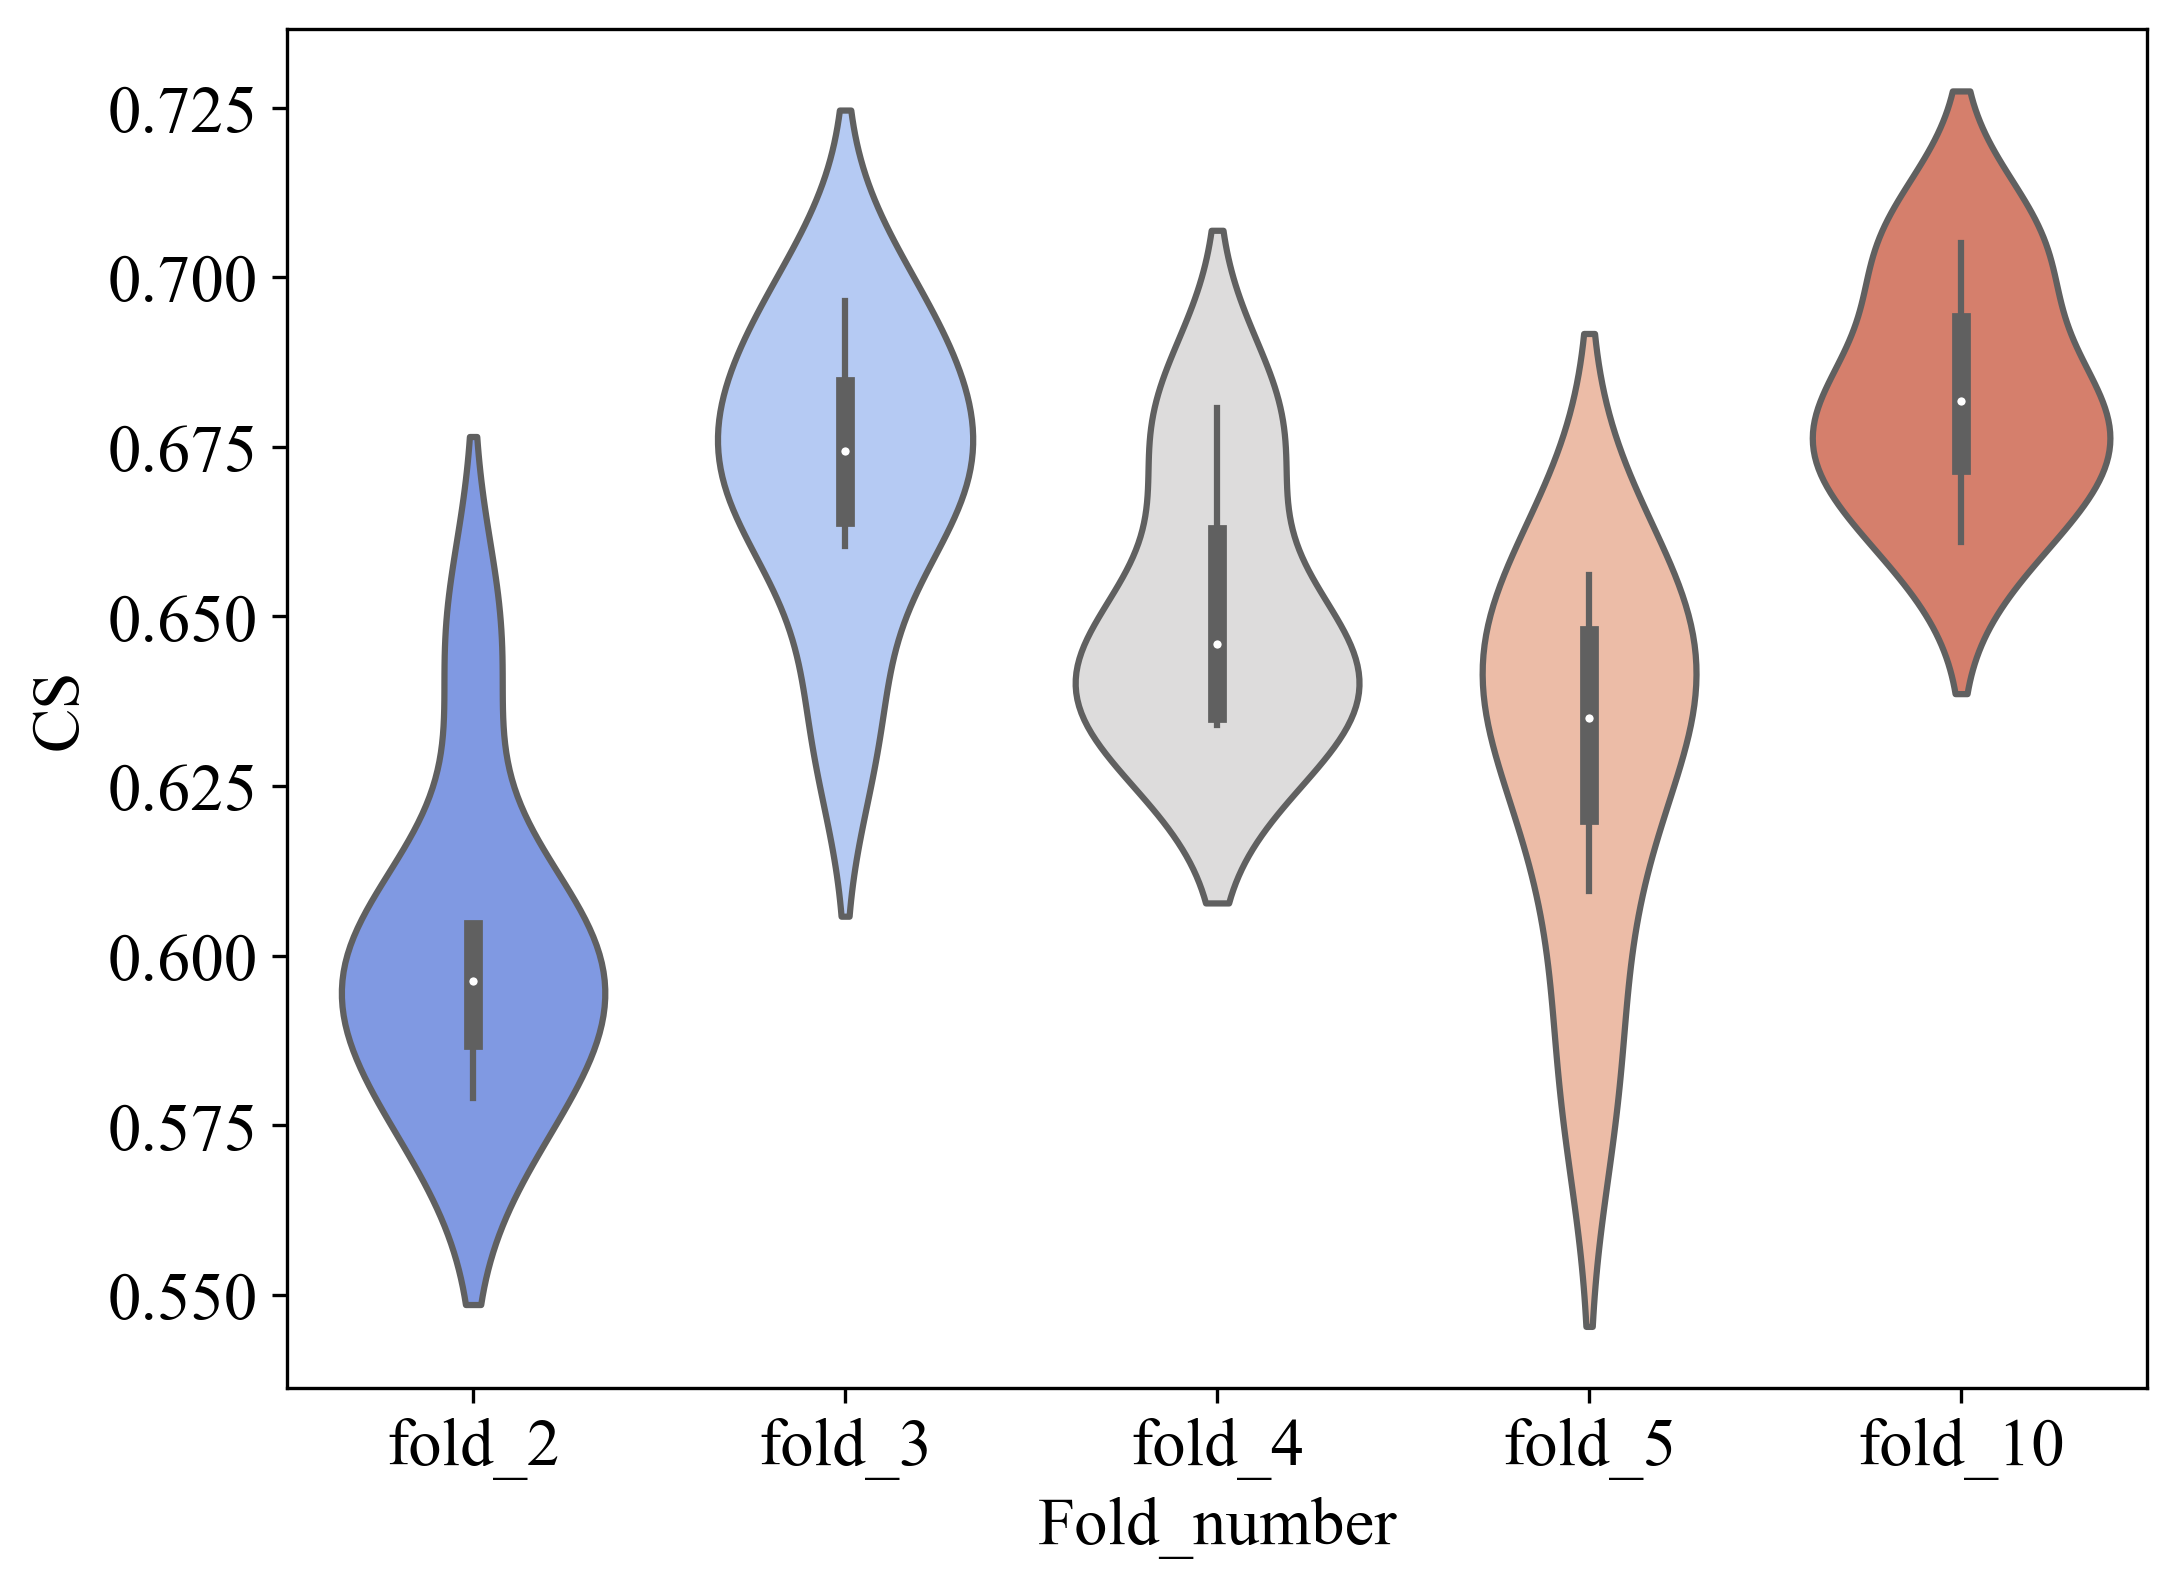

In [ ]:
scores = []
for i in list(range(2, 6))+[10]:
    scores.append(foldns(classifiers,X_train,y_train, n=i, names=names)[0]['cs'])
colors = ['#5D7599','#ABB6CB','#DADADA','#F7F0C6', '#C2C4B6']

sns.violinplot(data=scores, inner='box',palette='coolwarm')

plt.xticks([0,1,2,3,4],['fold_2','fold_3','fold_4','fold_5','fold_10'],rotation=0,fontsize=16)
plt.xlabel('Fold_number')
plt.ylabel('CS')
plt.show()

In [31]:
scores = foldns(classifiers,X_train,y_train,n=10,names=names)[0]
scores

,model,accuracy,f1-score,mcc,recall,cs
0,Random Forest,0.815368,0.524221,0.431818,0.46,0.669794
1,LGBM,0.824892,0.538571,0.461151,0.48,0.681732
2,Logistic Regression,0.810390,0.511587,0.426444,0.44,0.660988
3,ExtraTrees,0.820346,0.589805,0.483701,0.56,0.705076
4,XGBoost,0.815368,0.534286,0.434525,0.48,0.674827
5,GradientBoost,0.819913,0.546364,0.452564,0.48,0.683139
6,CatBoost,0.834416,0.572619,0.488075,0.50,0.703517


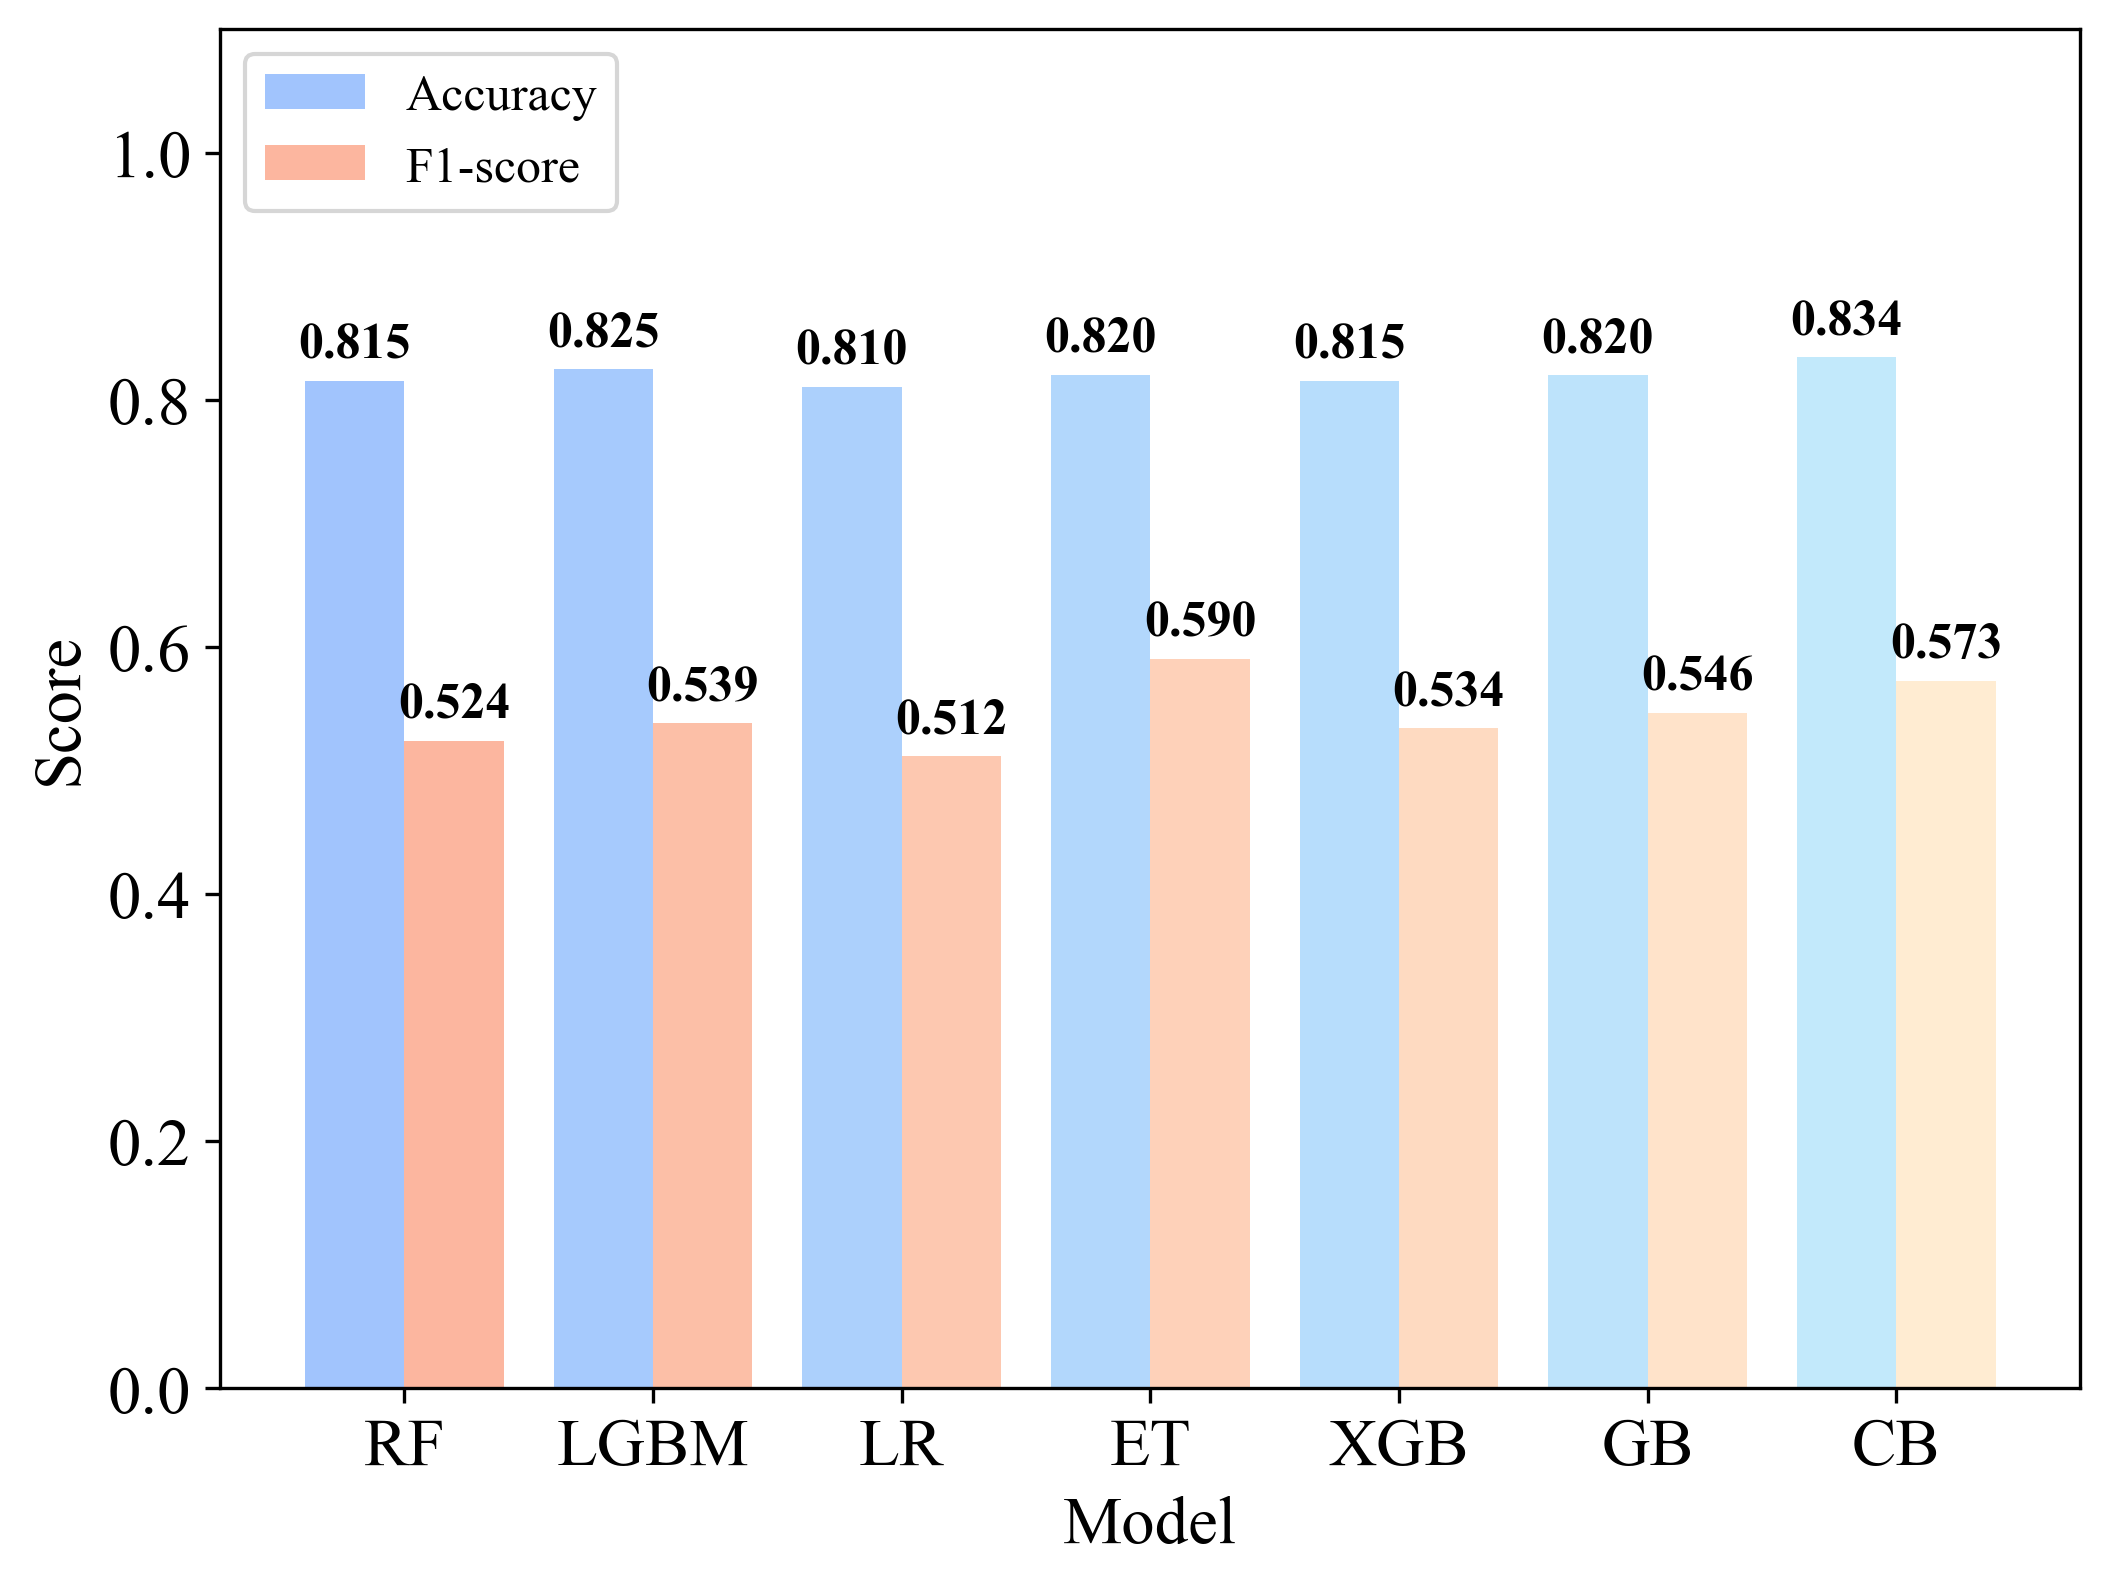

In [ ]:
import matplotlib.colors as mcolors

fig, ax = plt.subplots()

gradient1 = mcolors.LinearSegmentedColormap.from_list('my_gradient', ['#a1c4fd','#c2e9fb'])
gradient2 = mcolors.LinearSegmentedColormap.from_list('my_gradient', ['#fcb69f','#ffecd2'])

bar_width = 0.4
df = scores
x = ['RF', 'LGBM', 'LR', 'ET', 'XGB', 'GB', 'CB']
y1 = df['accuracy']
y2 = df['f1-score']

x1 = np.arange(len(x))
x2 = [x + bar_width for x in x1]

bars1 = ax.bar(x1, y1, width=bar_width, label='Accuracy', color=gradient1(np.linspace(0, 1, len(x))))
bars2 = ax.bar(x2, y2, width=bar_width, label='F1-score', color=gradient2(np.linspace(0, 1, len(x))))

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    fontsize=12,
                    ha='center', va='bottom', weight='bold')

autolabel(bars1)
autolabel(bars2)

ax.set_xticks((x1 + x2) / 2)
ax.set_xticklabels(x)
ax.set_ylabel('Score')
ax.set_xlabel('Model')
ax.legend(loc='upper left', prop={'size': 12})
ax.set_ylim(0, 1.1)
plt.xticks(fontsize=16)

plt.show()


In [33]:
from shap.explainers import Permutation
def get_shap_values(model,X,y):
    def predict(X):
        predictions = model.predict(X)
        return predictions
    
    explainer = Permutation(predict, X, feature_names=X.columns)
    shap_values = explainer(X)
    feature_importance = shap_values.abs.mean(0).values
    if len(feature_importance.shape) > 1: feature_importance = feature_importance[:, 0]
    return feature_importance

In [34]:
importances = []
names = [
            "Random Forest",
            'LGBM',
            "Logistic Regression",
            "ExtraTrees",
            "XGBoost",
            "GradientBoost",
            "CatBoost"
        ]
classifiers = [
            rf,
            lgbm,
            lr,
            ext,
            xb,
            gb,
            cb
        ]
for model in classifiers:
    model.fit(X_train.values,y_train.values)
    importances.append(get_shap_values(model,X_train,y_train))

Permutation explainer: 212it [02:07,  1.54it/s]                         
Permutation explainer: 212it [02:06,  1.53it/s]                         
Permutation explainer: 212it [00:13,  4.17it/s]                         


In [35]:
mean_importance = np.mean(importances, axis=0)
mean_importance

array([4.13482929e-03, 1.88557888e-03, 1.27125447e-02, 2.33204372e-02,
       1.34829287e-02, 2.07829577e-02, 2.00072541e-02, 1.38741658e-02,
       2.57520070e-03, 1.06780153e-02, 5.31134539e-02, 1.89534771e-02,
       6.48660412e-03, 4.20785376e-03, 4.59430312e-02, 3.31366670e-03,
       1.59493181e-03, 3.93123126e-03, 2.31647161e-03, 2.02243931e-02,
       1.83194700e-02, 1.73653158e-02, 9.45304188e-03, 1.58090724e-02,
       3.17342103e-03, 9.82977077e-03, 8.44810910e-03, 3.49187542e-02,
       1.92707225e-02, 3.15117516e-03, 1.18908985e-02, 5.60208918e-03,
       3.00222459e-03, 4.85395106e-03, 1.45081729e-06, 0.00000000e+00])

In [36]:
feature_importance = pd.DataFrame(data=mean_importance,columns=['shap_values'])
feature_importance['feature'] = X_train.columns
feature_importance['feature_index'] = feature_importance.index
feature_importance = feature_importance.sort_values(by='shap_values',ascending=False)

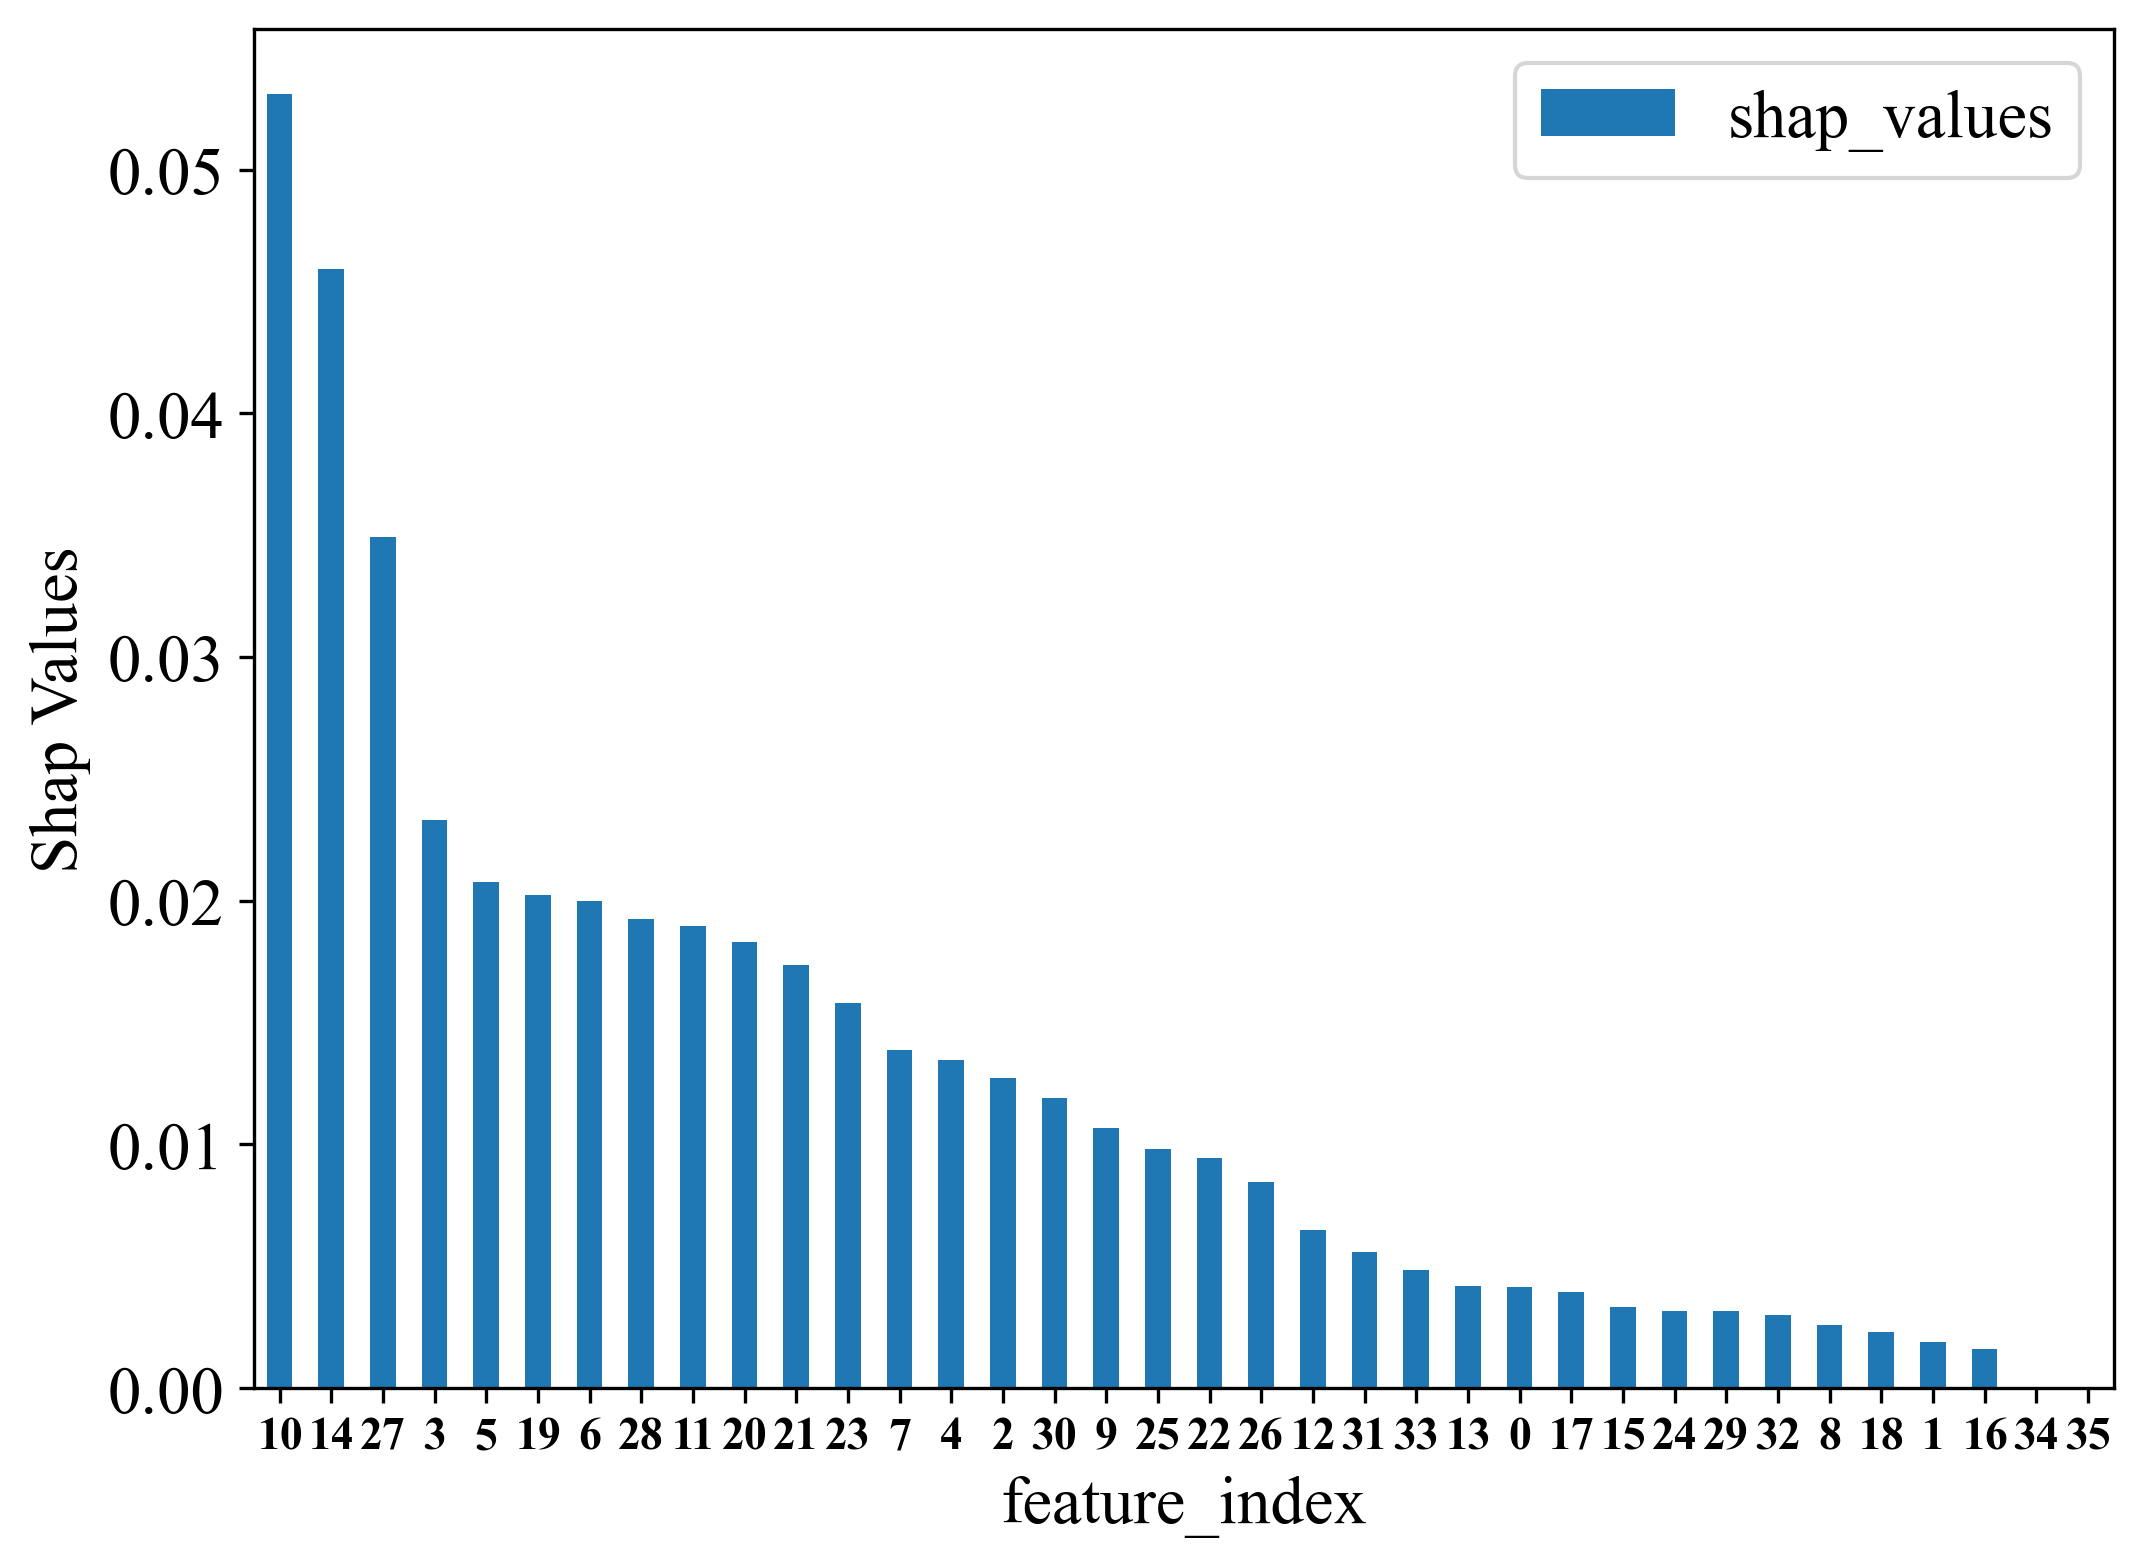

In [37]:
feature_importance.plot.bar(x='feature_index', y='shap_values', rot=0)
plt.ylabel('Shap Values')
plt.xticks(fontsize=11,fontweight='bold')
plt.show()

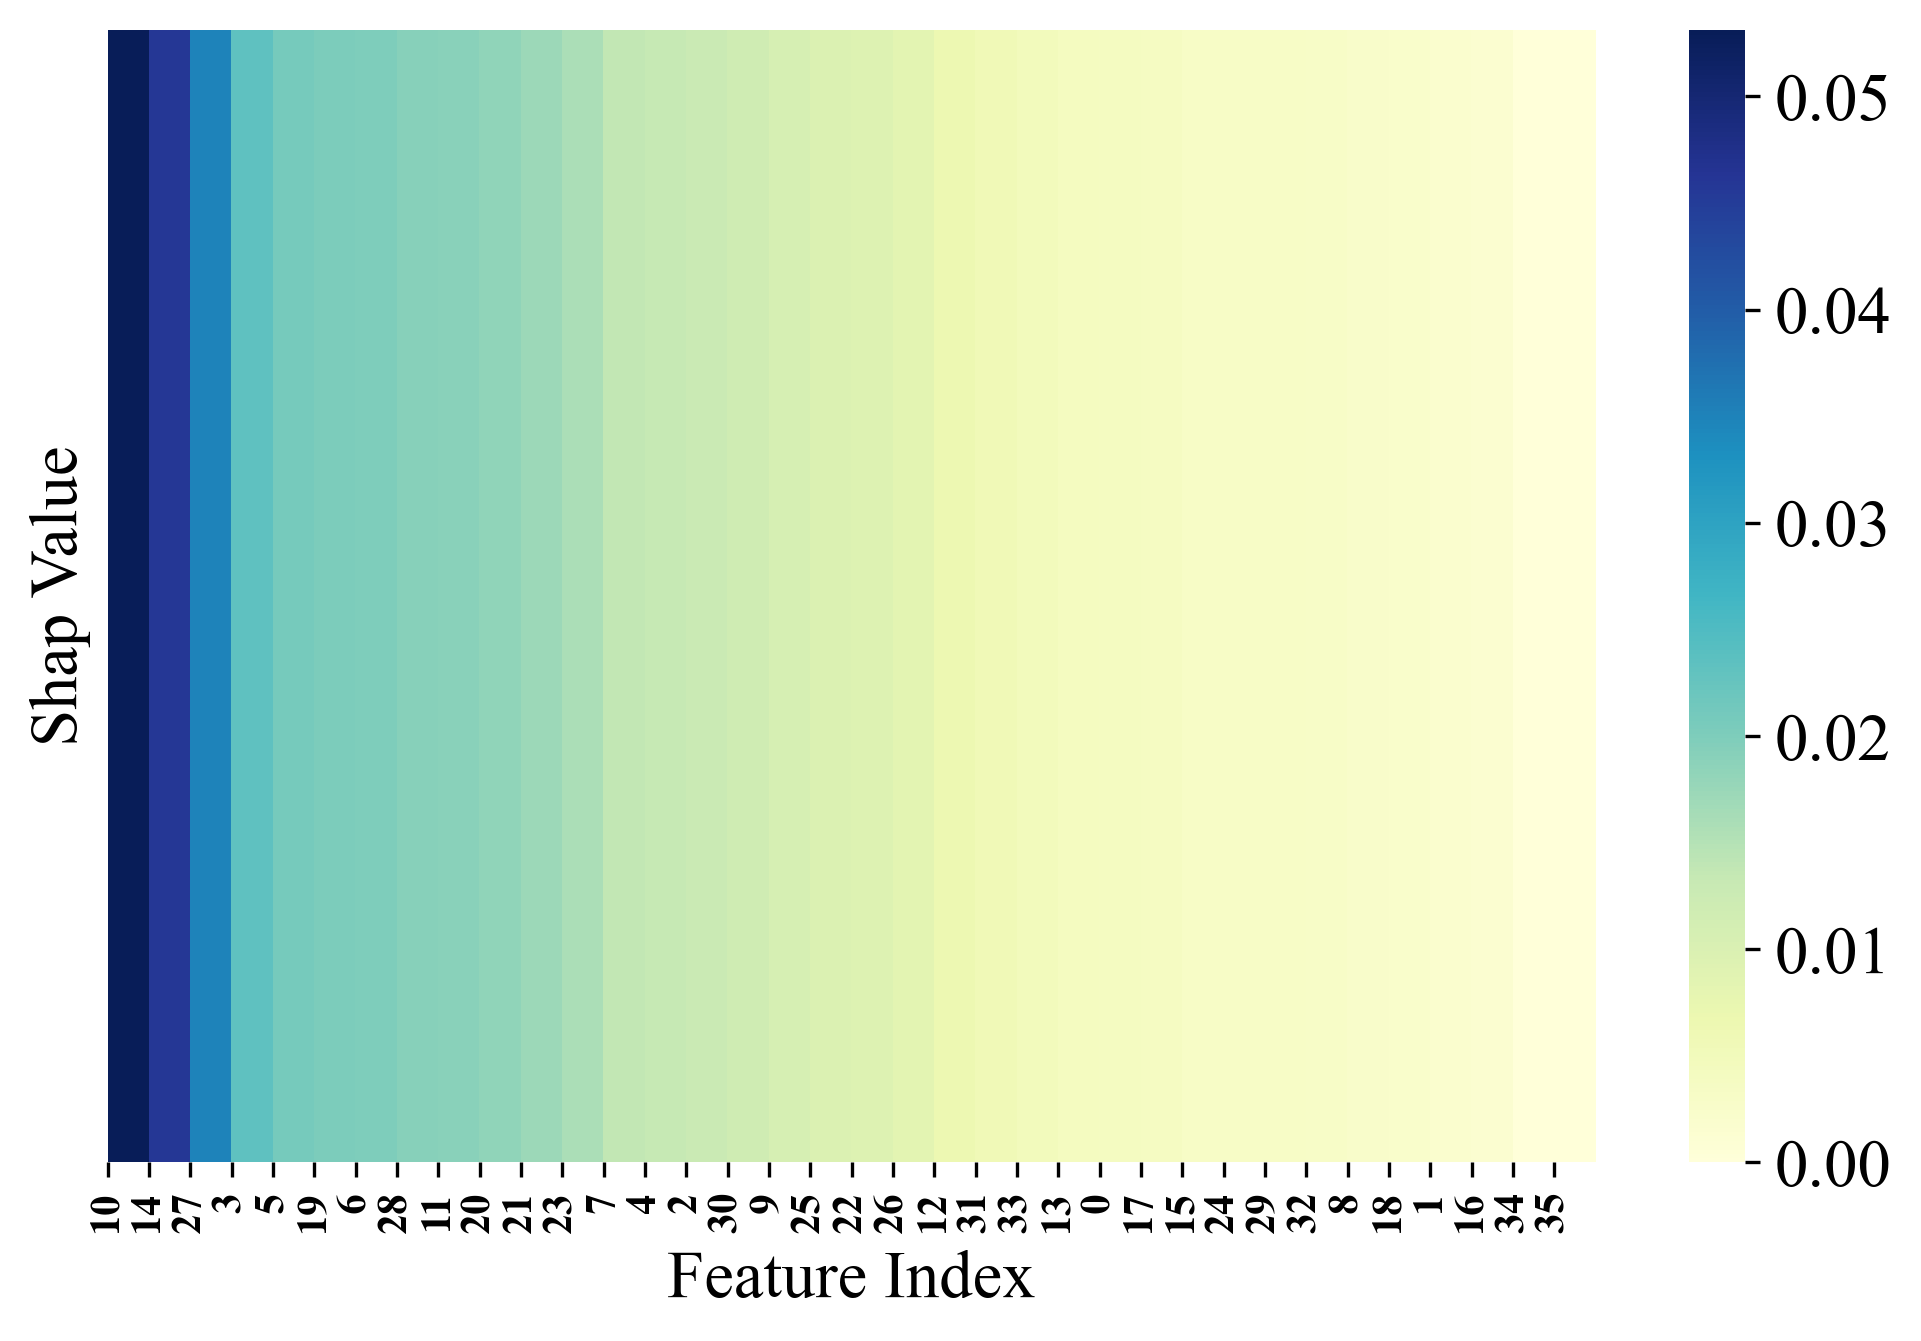

In [38]:
plt.figure(figsize=(8, 5))
sns.heatmap(feature_importance['shap_values'].values.reshape(1,36), cmap = 'YlGnBu')
plt.xticks(range(0,36),feature_importance['feature_index'],fontsize=10,rotation=90,fontweight='bold')
# plt.axvline(x=12, color='r', linestyle='--',alpha=0.5)
plt.yticks([])
plt.ylabel('Shap Value')
plt.xlabel('Feature Index')
plt.show()

In [39]:
def get_feature_importance(model,X):
    accs = []
    f1s = []
    cs = []
    nums = []
    cols = []
    result = {}
    for i in range(1,len(feature_importance['feature'])+1):
        features = feature_importance['feature'][0:i]
        X_tmp = X[features]
        score,_,_ = foldn_score(model,X_tmp.values,y_train.values,n=10)
        accs.append(score['accuracy'])
        f1s.append(score['f1-score'])
        cs.append(0.5*score['accuracy']+0.5*score['f1-score'])
        nums.append(i)
        cols.append(features.values)
        result['accuracy'] = accs
        result['f1-score'] = f1s
        result['cs'] = cs
        result['num'] = nums
        result['features'] = cols
    result = pd.DataFrame(result)
    return result

In [40]:
result = []
model = cb
result.append(get_feature_importance(model,X_train))

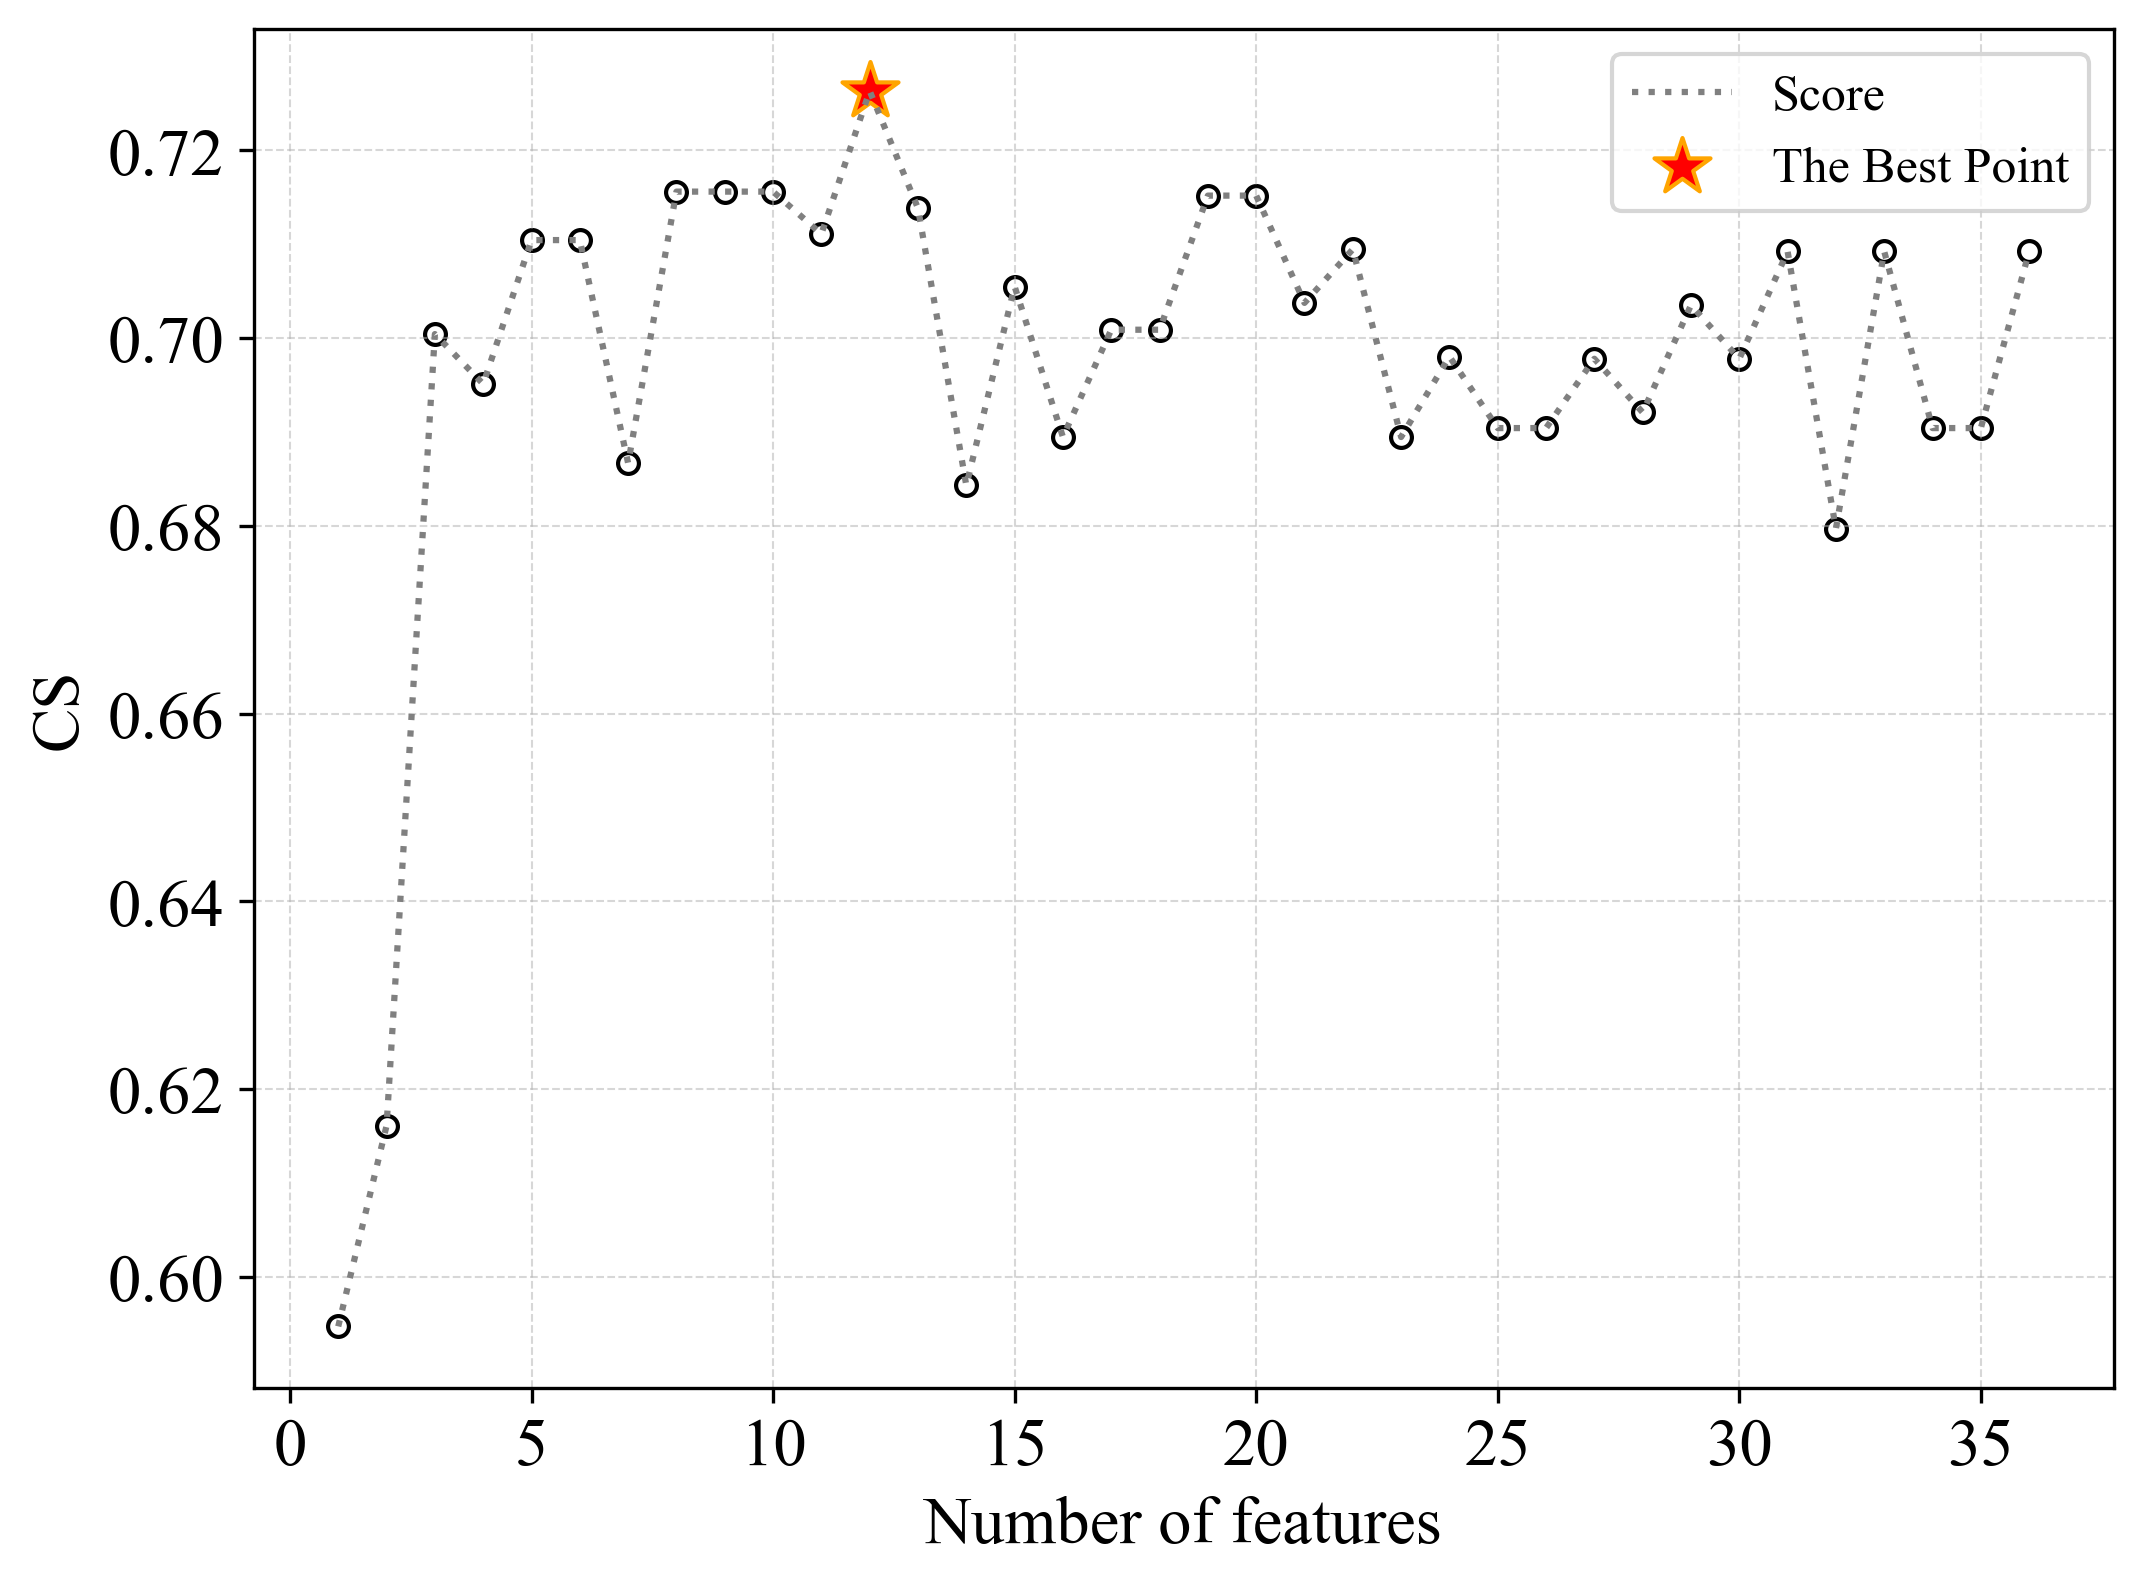

In [41]:
f_fig, f_ax = plt.subplots(figsize=(8, 6))

df = result[0]
to_select = df.sort_values(by='cs',ascending=False)
f_ax.plot(df['num'],df['cs'], linestyle=':',color='grey',alpha=1,label="Score")
f_ax.scatter(df['num'],df['cs'], marker='.',s=100,color='white',edgecolors='black',alpha=1)
f_ax.scatter(to_select.iloc[0]['num'],to_select.iloc[0]['cs'], marker='*',s=200,color='red',edgecolors='orange',alpha=1,label="The Best Point")
# plt.axvline(x=25, color='r', linestyle='--',alpha=0.4)

f_ax.set_xlabel("Number of features"), plt.ylabel("CS")
f_ax.legend(prop={'size': 12})
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

In [42]:
to_select.iloc[0]['features']

array(['$Dp_b$', '$F_b$', 'LUMO_character', '$R_b$', '$D_b$', '$Nd_b$',
       '$Ce_a$', 'LUMO_element', '$Fi_b$', '$(En)diff_{ab}$',
       '$(En)diff_{cb}$', '$o$'], dtype=object)

In [43]:
X3 = X_train[to_select.iloc[0]['features']]
scores3 = foldns(classifiers,X3,y_train,n=10,names=names)[0]
scores3

,model,accuracy,f1-score,mcc,recall,cs
0,Random Forest,0.839177,0.559921,0.486009,0.480,0.699549
1,LGBM,0.829870,0.574603,0.484684,0.500,0.702237
2,Logistic Regression,0.839177,0.577778,0.503304,0.485,0.708478
3,ExtraTrees,0.815584,0.545000,0.440907,0.500,0.680292
4,XGBoost,0.810823,0.544704,0.436267,0.500,0.677763
5,GradientBoost,0.829437,0.565556,0.474219,0.500,0.697496
6,CatBoost,0.853463,0.599206,0.539142,0.500,0.726335


In [44]:
import optuna
def get_voting_weights(models,X,y,names,n_trials=100):
    def get_model(**params):
        weights=list(params.values())
        return VotingClassifier(estimators=[(name, model) for name, model in zip(names, models)],
                                        voting='soft', weights=weights)
    
    
    def objective(trial):
        params = {}
        for i in range(len(models)):
            params['weights_%s'%i] = trial.suggest_float('weights_%s'%i, 0, 1)
        model = get_model(**params)
        score,_,_ = foldn_score(model,X,y,n=10)
        return score['cs']
    
    def get_init_param():
        scores,_,_ = foldns(models,X,y,10,names)
        scores = scores['cs'].values
        score_sum = sum(scores)
        weights = [x/score_sum for x in scores]
        init_param = {}
        for i,x in zip(range(len(models)),weights):
            init_param['weights_%s'%i] = x
        return init_param

    study = optuna.create_study(direction='maximize',load_if_exists=get_init_param())
    study.optimize(objective, n_trials=n_trials,n_jobs=1)

    best_params = study.best_params
    
    return list(best_params.values())

In [45]:
weights = get_voting_weights(classifiers,X3,y_train,names,n_trials=100)
voting_clf =  VotingClassifier(estimators=[(name, model) for name, model in zip(names, classifiers)],
                                        voting='soft',weights=weights)

[I 2023-11-03 13:38:58,154] A new study created in memory with name: no-name-27824900-8fd2-40c0-a584-b9e69803a779
[I 2023-11-03 13:39:25,160] Trial 0 finished with value: 0.7003823953823953 and parameters: {'weights_0': 0.34660006422565126, 'weights_1': 0.0767854826515143, 'weights_2': 0.19344687957551998, 'weights_3': 0.7586991498934589, 'weights_4': 0.7905892685629969, 'weights_5': 0.8899484706201158, 'weights_6': 0.7210488663751929}. Best is trial 0 with value: 0.7003823953823953.
[I 2023-11-03 13:39:53,131] Trial 1 finished with value: 0.724549062049062 and parameters: {'weights_0': 0.4821867637616397, 'weights_1': 0.6124352730138738, 'weights_2': 0.64561340918393, 'weights_3': 0.10708543911429846, 'weights_4': 0.31808214344987007, 'weights_5': 0.46812989497434976, 'weights_6': 0.30083070517568566}. Best is trial 1 with value: 0.724549062049062.
[I 2023-11-03 13:40:20,952] Trial 2 finished with value: 0.7318217893217892 and parameters: {'weights_0': 0.04468847010674393, 'weights_1'

[I 2023-11-03 13:49:09,111] Trial 22 finished with value: 0.7318217893217892 and parameters: {'weights_0': 0.08840384521105095, 'weights_1': 0.7499094845435798, 'weights_2': 0.5633351062941827, 'weights_3': 0.6082849393248216, 'weights_4': 0.858130826567961, 'weights_5': 0.6111587189658904, 'weights_6': 0.10165623404565233}. Best is trial 2 with value: 0.7318217893217892.
[I 2023-11-03 13:49:34,668] Trial 23 finished with value: 0.7261075036075035 and parameters: {'weights_0': 0.012493444511423972, 'weights_1': 0.9219650029906723, 'weights_2': 0.469531578944726, 'weights_3': 0.4702649649721802, 'weights_4': 0.7206715869339165, 'weights_5': 0.7057394441670212, 'weights_6': 0.01569562969763892}. Best is trial 2 with value: 0.7318217893217892.
[I 2023-11-03 13:49:58,849] Trial 24 finished with value: 0.7188347763347763 and parameters: {'weights_0': 0.10248166144763346, 'weights_1': 0.8294393190342124, 'weights_2': 0.5874885810973538, 'weights_3': 0.6677895603692597, 'weights_4': 0.9223088

[I 2023-11-03 13:58:21,802] Trial 44 finished with value: 0.7318217893217892 and parameters: {'weights_0': 0.06116497629933437, 'weights_1': 0.7713525629378173, 'weights_2': 0.5497154538519513, 'weights_3': 0.44534197155724875, 'weights_4': 0.8913906904234606, 'weights_5': 0.8198825480676697, 'weights_6': 0.05408636599268497}. Best is trial 2 with value: 0.7318217893217892.
[I 2023-11-03 13:58:45,994] Trial 45 finished with value: 0.7261075036075035 and parameters: {'weights_0': 0.05418875638528984, 'weights_1': 0.9732210700922488, 'weights_2': 0.4362649513636797, 'weights_3': 0.6990119054006563, 'weights_4': 0.8185109945751783, 'weights_5': 0.5231114268063235, 'weights_6': 0.006506834572267042}. Best is trial 2 with value: 0.7318217893217892.
[I 2023-11-03 13:59:10,722] Trial 46 finished with value: 0.7261075036075035 and parameters: {'weights_0': 0.12470489461325927, 'weights_1': 0.9996358965893589, 'weights_2': 0.356379264075591, 'weights_3': 0.6314329471124938, 'weights_4': 0.94820

[I 2023-11-03 14:07:37,191] Trial 66 finished with value: 0.7261075036075035 and parameters: {'weights_0': 0.13986893481642323, 'weights_1': 0.8772849667780752, 'weights_2': 0.3750923124907667, 'weights_3': 0.5977118151817516, 'weights_4': 0.7755363163525404, 'weights_5': 0.6293054035486557, 'weights_6': 0.08646777309446878}. Best is trial 2 with value: 0.7318217893217892.
[I 2023-11-03 14:08:02,321] Trial 67 finished with value: 0.7318217893217892 and parameters: {'weights_0': 0.022656698361224525, 'weights_1': 0.9657256789358004, 'weights_2': 0.5032719163403139, 'weights_3': 0.9918675526738961, 'weights_4': 0.8099373487182375, 'weights_5': 0.7361012253431405, 'weights_6': 0.15290878223108453}. Best is trial 2 with value: 0.7318217893217892.
[I 2023-11-03 14:08:29,999] Trial 68 finished with value: 0.7261075036075035 and parameters: {'weights_0': 0.059137922442546745, 'weights_1': 0.9244417347674203, 'weights_2': 0.4185378633074328, 'weights_3': 0.48903195904486585, 'weights_4': 0.907

[I 2023-11-03 14:17:00,319] Trial 88 finished with value: 0.7318217893217892 and parameters: {'weights_0': 0.0157944563404563, 'weights_1': 0.9964980522430362, 'weights_2': 0.5004863516386241, 'weights_3': 0.6591743729972176, 'weights_4': 0.7186507405209103, 'weights_5': 0.5384318946654438, 'weights_6': 0.11674212825142269}. Best is trial 2 with value: 0.7318217893217892.
[I 2023-11-03 14:17:25,470] Trial 89 finished with value: 0.7318217893217892 and parameters: {'weights_0': 0.16318105973360603, 'weights_1': 0.901821639018877, 'weights_2': 0.3946745320876838, 'weights_3': 0.6228609643159836, 'weights_4': 0.6667275949352095, 'weights_5': 0.6082948178148104, 'weights_6': 0.0627511067513844}. Best is trial 2 with value: 0.7318217893217892.
[I 2023-11-03 14:17:50,730] Trial 90 finished with value: 0.7267712842712842 and parameters: {'weights_0': 0.0015777981654660177, 'weights_1': 0.8094481116588429, 'weights_2': 0.4274187251324526, 'weights_3': 0.5689615024481609, 'weights_4': 0.7604084

In [46]:
scores4 = foldns(classifiers+[voting_clf],X3,y_train,n=10,names=names+['Voting'])[0]
scores4

,model,accuracy,f1-score,mcc,recall,cs
0,Random Forest,0.839177,0.559921,0.486009,0.480,0.699549
1,LGBM,0.829870,0.574603,0.484684,0.500,0.702237
2,Logistic Regression,0.839177,0.577778,0.503304,0.485,0.708478
3,ExtraTrees,0.815584,0.545000,0.440907,0.500,0.680292
4,XGBoost,0.810823,0.544704,0.436267,0.500,0.677763
5,GradientBoost,0.829437,0.565556,0.474219,0.500,0.697496
6,CatBoost,0.853463,0.599206,0.539142,0.500,0.726335
7,Voting,0.848485,0.615159,0.534957,0.540,0.731822


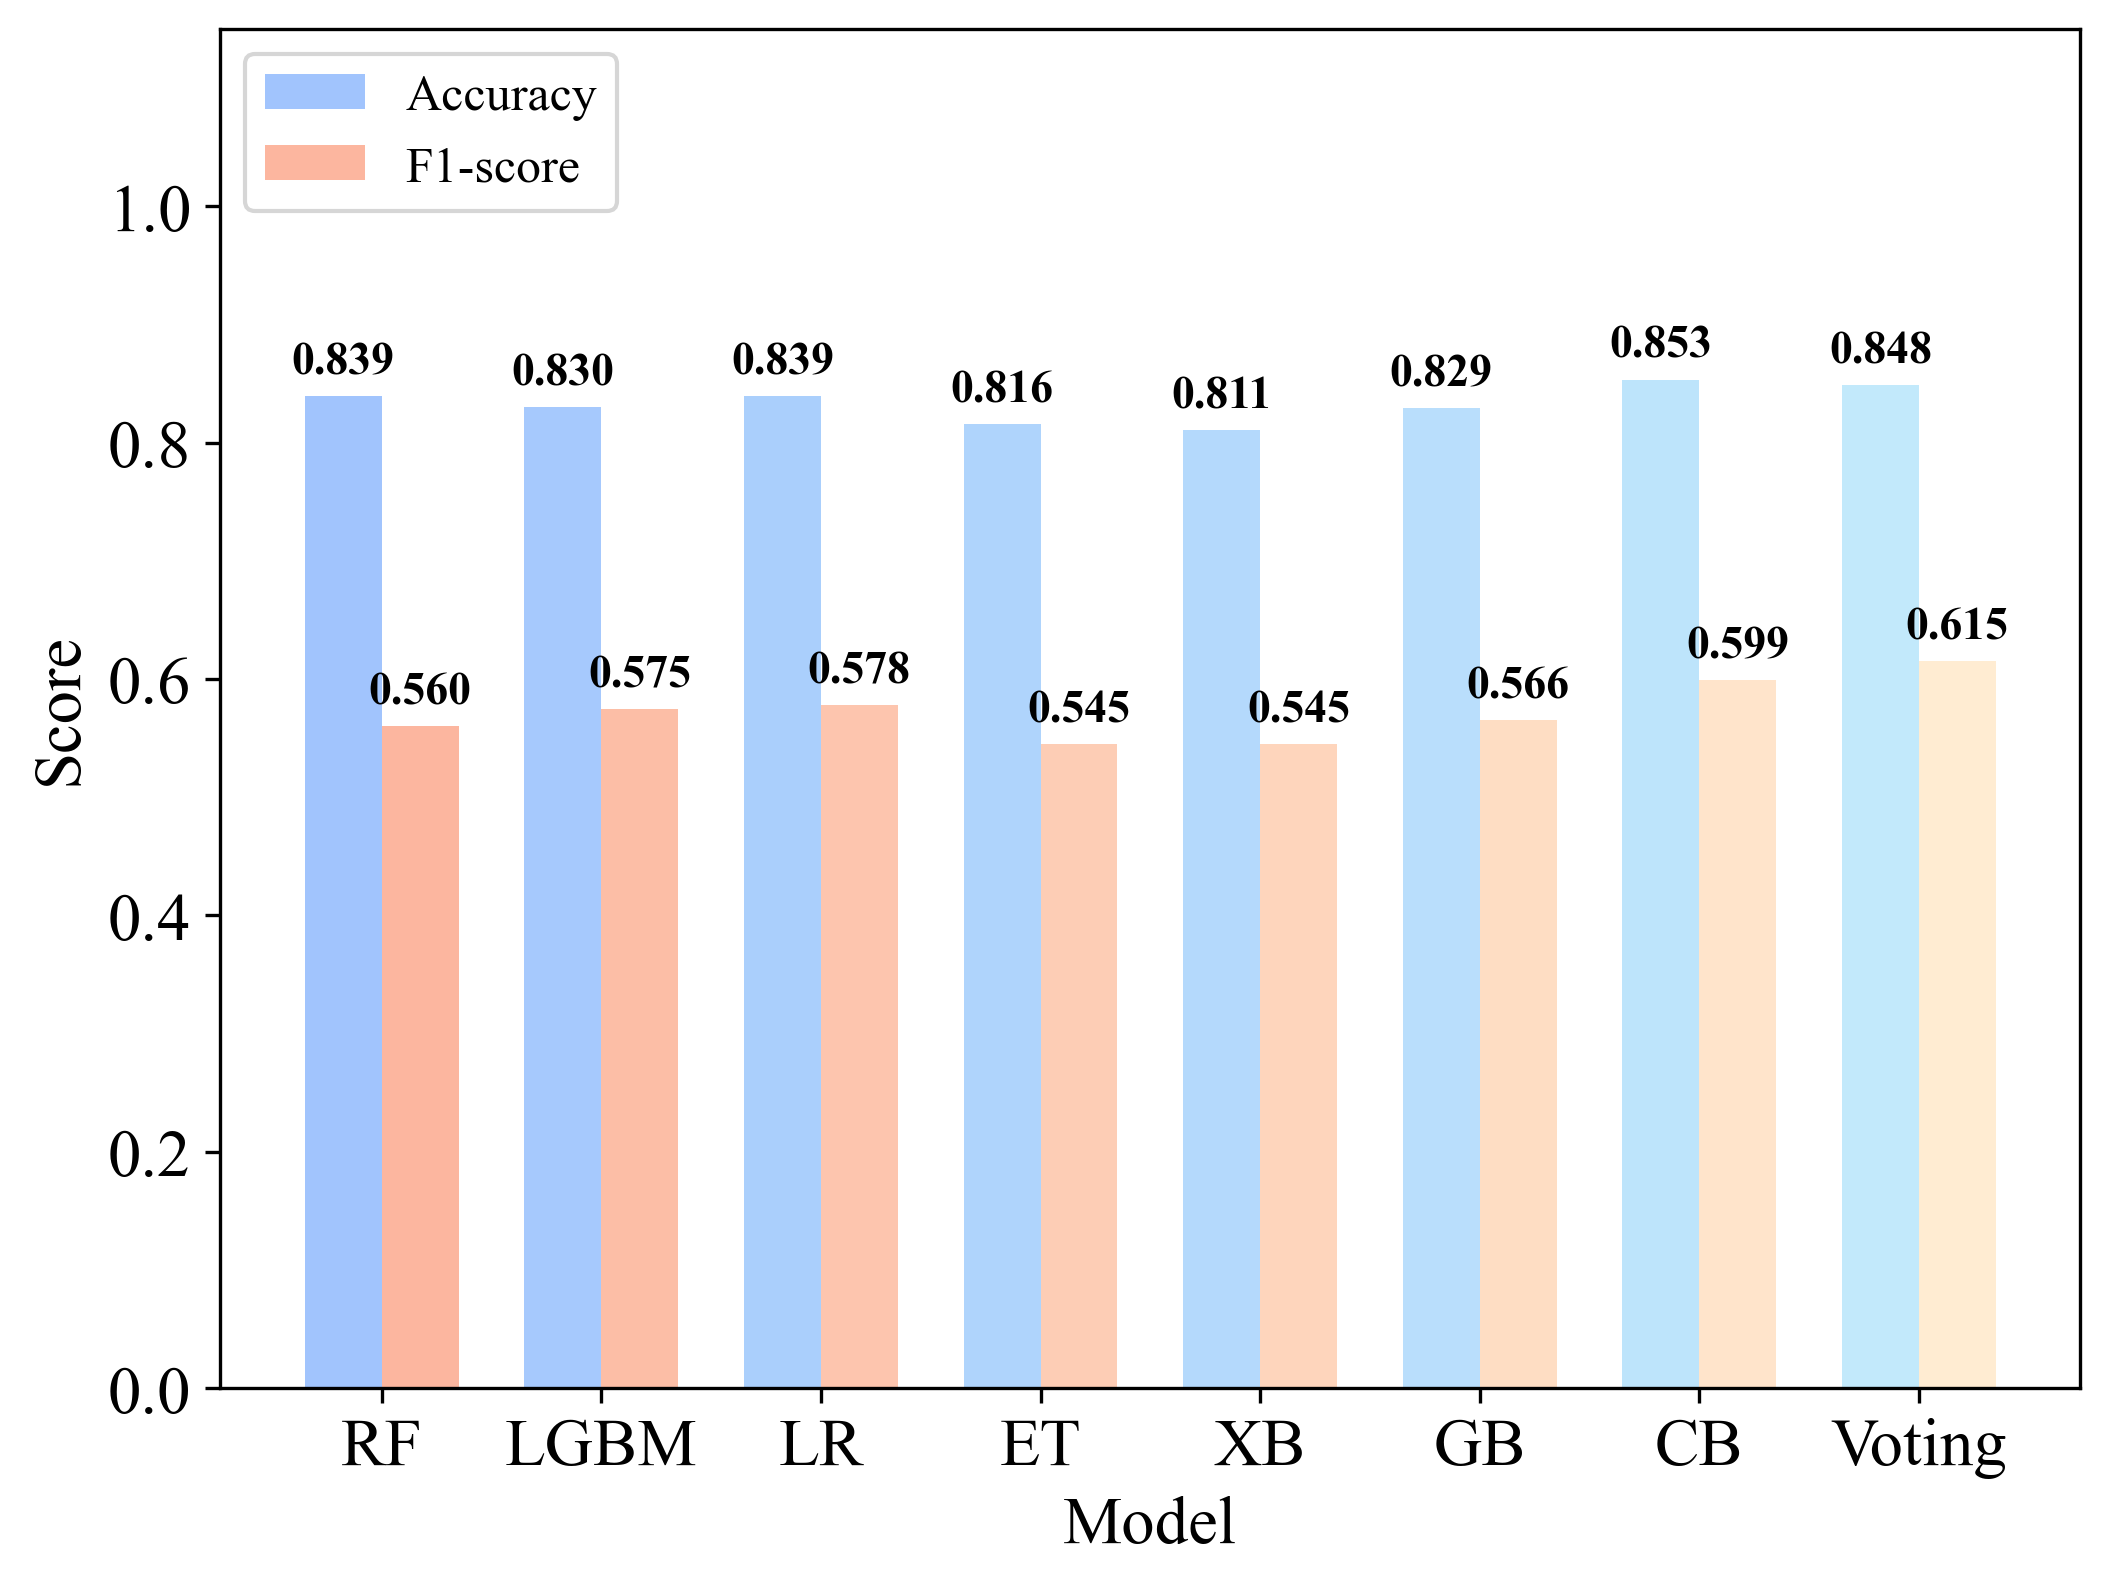

In [ ]:
fig, ax = plt.subplots()

gradient1 = mcolors.LinearSegmentedColormap.from_list('my_gradient', ['#a1c4fd','#c2e9fb'])
gradient2 = mcolors.LinearSegmentedColormap.from_list('my_gradient', ['#fcb69f','#ffecd2'])
gradient3 = mcolors.LinearSegmentedColormap.from_list('my_gradient', ['#FFECB3','#BDBDBD'])
# gradient4 = mcolors.LinearSegmentedColormap.from_list('my_gradient', ['#BDBDBD','#fcb69f'])
bar_width = 0.35
df = scores4
x = [ "RF",'LGBM',"LR","ET","XB","GB","CB",'Voting']
y1 = df['accuracy']
y2 = df['f1-score']
y3 = df['cs']

x1 = np.arange(len(x))
x2 = [x + bar_width for x in x1]
# x3 = [x + bar_width for x in x2]
# x4 = [x + bar_width for x in x3]
bars1 = ax.bar(x1, y1, width=bar_width, label='Accuracy', color=gradient1(np.linspace(0, 1, len(x))))
bars2 = ax.bar(x2, y2, width=bar_width, label='F1-score', color=gradient2(np.linspace(0, 1, len(x))))
# bars3 = ax.bar(x3, y3, width=bar_width, label='CS', color=gradient3(np.linspace(0, 1, len(x))))
# bars4 = ax.bar(x3, y3, width=bar_width, label='CS', color=gradient3(np.linspace(0, 1, len(x))))
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    fontsize=11,
                    ha='center', va='bottom', weight='bold')

autolabel(bars1)
autolabel(bars2)
# autolabel(bars3)
ax.set_xticks((x1+x2)/2)
ax.set_xticklabels(x)
ax.set_ylabel('Score')
ax.set_xlabel('Model')
ax.legend(loc='upper left', prop={'size': 12})
ax.set_ylim(0, 1.15)
plt.xticks(fontsize=16)

plt.show()

In [48]:
pd.concat([X3,y_train],axis=1).to_csv('init_data.csv')
pd.concat([X_test[X3.columns],y_test],axis=1).to_csv('test_data.csv')

In [49]:
test_data = pd.DataFrame({'formula':['Na2MoSe4','ZnLu2S4','BeLu2S4'],'$y$':[1,1,1]})

In [50]:
test_data = Featurizor().featurize(test_data,is_structure=False,is_new_data=True)
# test_data['f'] = get_f(test_data)
test_data = test_data[X3.columns]
test_data

MultipleFeaturizer:   0%|          | 0/3 [00:00<?, ?it/s]

,$Dp_b$,$F_b$,LUMO_character,$R_b$,$D_b$,$Nd_b$,$Ce_a$,LUMO_element,$Fi_b$,$(En)diff_{ab}$,$(En)diff_{cb}$,$o$
0,162.7,1,3,1.02,0.971,0,6.82,42,495.8,1.23,1.62,0.515152
1,137.0,3,1,0.86,9.840,1,1.35,30,523.5,0.38,1.31,0.467391
2,137.0,3,1,0.86,9.840,1,3.32,4,523.5,0.30,1.31,0.467391


In [51]:
for model,name in zip(classifiers+[voting_clf],names+['Voting']):
    model.fit(X3.values,y_train.values)
    print(name,model.predict(test_data.values))

Random Forest [0 1 1]
LGBM [1 1 1]
Logistic Regression [0 1 1]
ExtraTrees [1 1 1]
XGBoost [0 1 1]
GradientBoost [1 1 0]
CatBoost [0 1 1]
Voting [1 1 1]


In [1]:
accuracies = []
f1s = []
for model,name in zip(classifiers+[voting_clf],names+['Voting']):
    y_pred = model.predict(X_test[X3.columns].values)
    accuracies.append(accuracy_score(y_test,y_pred))
    f1s.append(f1_score(y_test,y_pred))
test_score = pd.DataFrame({'model':names+['Voting'],'accuracy':accuracies,'f1':f1s})
test_score

NameError: name 'classifiers' is not defined

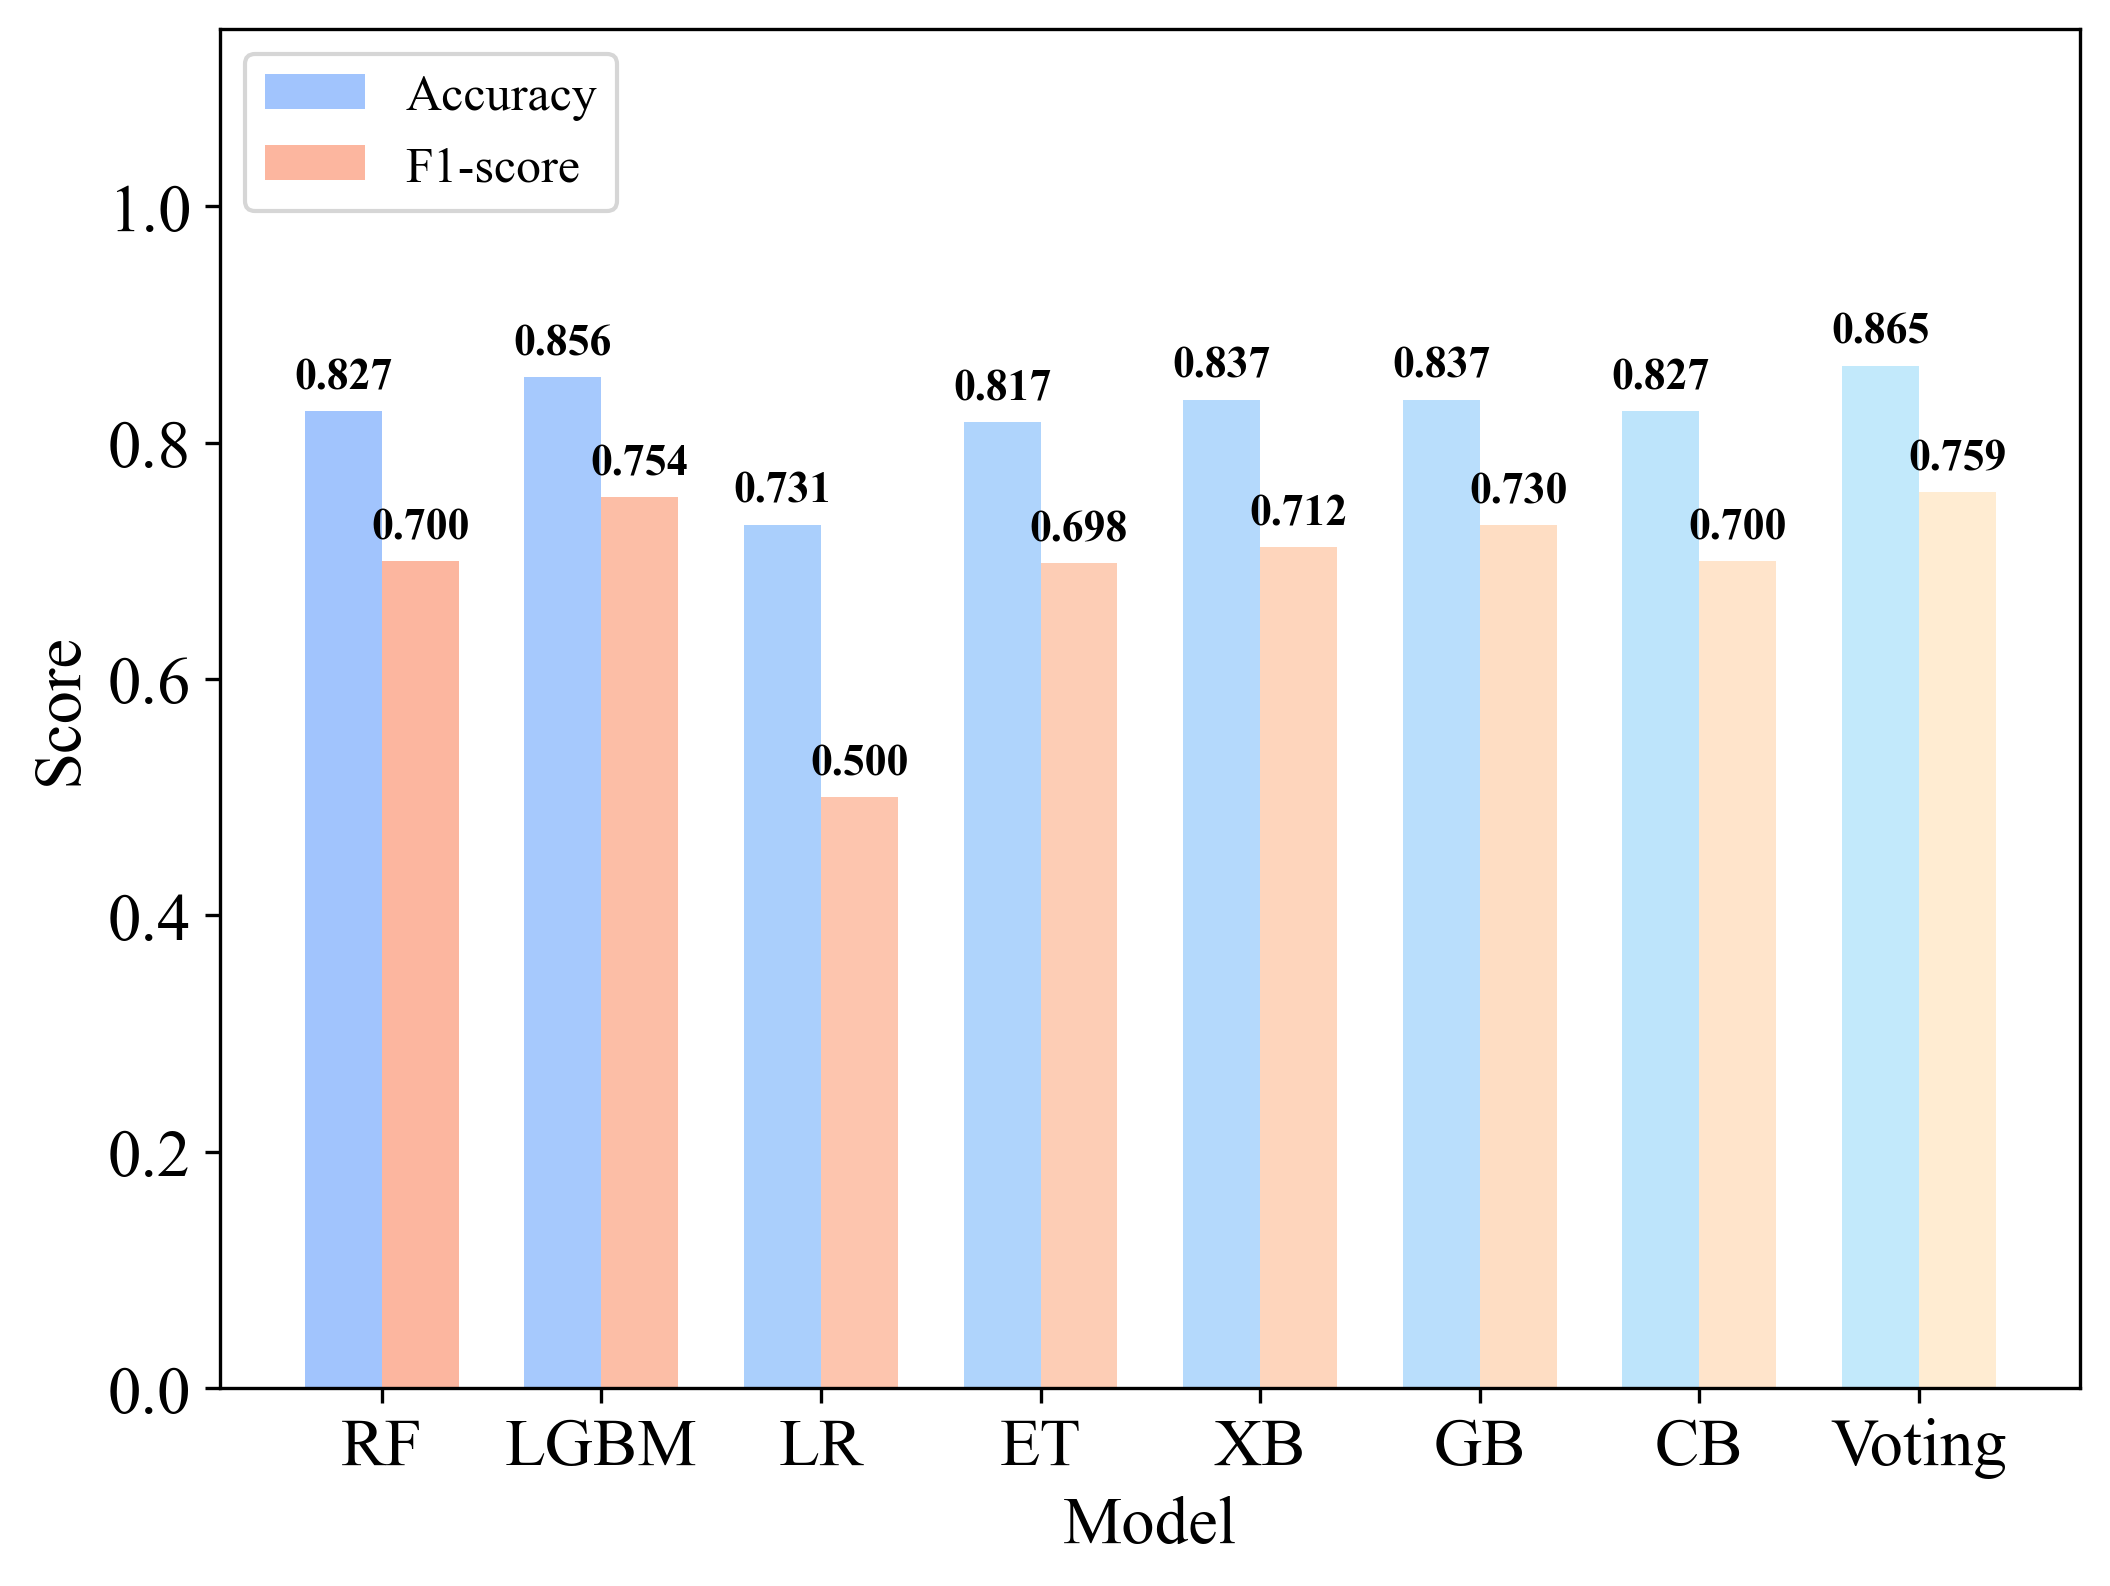

In [ ]:
fig, ax = plt.subplots()

gradient1 = mcolors.LinearSegmentedColormap.from_list('my_gradient', ['#a1c4fd','#c2e9fb'])
gradient2 = mcolors.LinearSegmentedColormap.from_list('my_gradient', ['#fcb69f','#ffecd2'])
gradient3 = mcolors.LinearSegmentedColormap.from_list('my_gradient', ['#FFECB3','#BDBDBD'])
# gradient4 = mcolors.LinearSegmentedColormap.from_list('my_gradient', ['#BDBDBD','#fcb69f'])
bar_width = 0.35
df = test_score
x = [ "RF",'LGBM',"LR","ET","XB","GB","CB",'Voting']
y1 = df['accuracy']
y2 = df['f1']


x1 = np.arange(len(x))
x2 = [x + bar_width for x in x1]
# x3 = [x + bar_width for x in x2]
# x4 = [x + bar_width for x in x3]
bars1 = ax.bar(x1, y1, width=bar_width, label='Accuracy', color=gradient1(np.linspace(0, 1, len(x))))
bars2 = ax.bar(x2, y2, width=bar_width, label='F1-score', color=gradient2(np.linspace(0, 1, len(x))))
# bars3 = ax.bar(x3, y3, width=bar_width, label='CS', color=gradient3(np.linspace(0, 1, len(x))))
# bars4 = ax.bar(x3, y3, width=bar_width, label='CS', color=gradient3(np.linspace(0, 1, len(x))))
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    fontsize=10.5,
                    ha='center', va='bottom', weight='bold')

autolabel(bars1)
autolabel(bars2)
# autolabel(bars3)
ax.set_xticks((x1+x2)/2)
ax.set_xticklabels(x)
ax.set_ylabel('Score')
ax.set_xlabel('Model')
ax.legend(loc='upper left', prop={'size': 12})
ax.set_ylim(0, 1.15)
plt.xticks(fontsize=16)

plt.show()